# **0. Introduction**

From the ABA and NBA merger to the new In-Season Tournament, the NBA has been through many different eras, and each came with revolutionary changes to the game. One of the most important eras is today's 3-Point Revolution, whose inception can be traced to the implementation of the radical 3-Point line in 1976. Anyone who has followed the NBA closely over the past decade can see with their eyes the boom of the 3-point shot and how the product on the court is impacted greatly by it when in the decades before that was not the case.

In this study, NBA game and season data from the 1999–2000 to 2022–2023 regular seasons is analyzed to observe 3-point shooting trends in the NBA and provide a scoring analysis that looks into the shooting habits of players today.

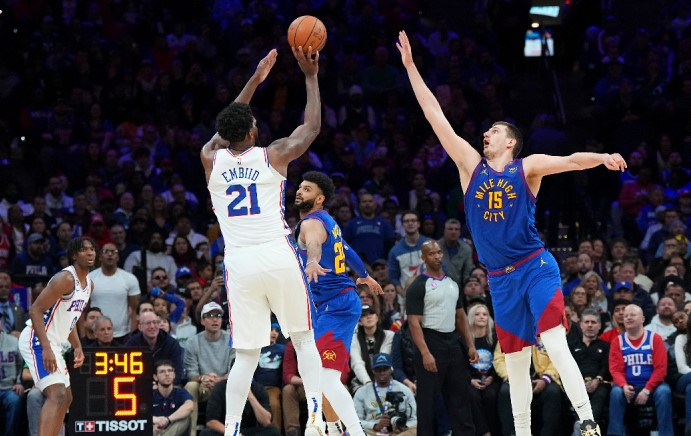

**Questions to keep in mind:**
1. When and how did the NBA 3-Point boom arrive within the past 20 years?
2. What are some common shooting habits that players today have opposed to their veteran counterparts from the early 2000s?

In [30]:
#Importing our packages and models
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.patches import Circle, Rectangle, Arc
from matplotlib.ticker import PercentFormatter, FuncFormatter
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# **1. Data Overview**

For this exploration of 3-point shooting, we'll be implementing the use of different NBA shooting datasets found on Kaggle. All DataFrames have been cleaned to have no missing or null values (please look into the code to see different processes applied to clean data).

**Team Statistics Dataset**:

>Mostly comprised of Field Goals made and attempt rates by teams over the course of many seasons.

In [31]:
#importing Team Stats DataFrame
team_totals = pd.read_csv('/kaggle/input/nba-datasets/Team Stats Per Game.csv')

#only including the seasons between 1999 and 2023
team_totals = team_totals.loc[(team_totals['season'] < 2024) & (team_totals['season'] > 1999)]

#show a preview of the DataFrame
print(team_totals.info())
team_totals

<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 31 to 769
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         739 non-null    int64  
 1   lg             739 non-null    object 
 2   team           739 non-null    object 
 3   abbreviation   715 non-null    object 
 4   playoffs       739 non-null    bool   
 5   g              739 non-null    float64
 6   mp_per_game    739 non-null    float64
 7   fg_per_game    739 non-null    float64
 8   fga_per_game   739 non-null    float64
 9   fg_percent     739 non-null    float64
 10  x3p_per_game   739 non-null    float64
 11  x3pa_per_game  739 non-null    float64
 12  x3p_percent    739 non-null    float64
 13  x2p_per_game   739 non-null    float64
 14  x2pa_per_game  739 non-null    float64
 15  x2p_percent    739 non-null    float64
 16  ft_per_game    739 non-null    float64
 17  fta_per_game   739 non-null    float64
 18  ft_percent    

season   lg                 team abbreviation  playoffs     g  \
31     2023  NBA        Atlanta Hawks          ATL     False  82.0   
32     2023  NBA       Boston Celtics          BOS     False  82.0   
33     2023  NBA        Brooklyn Nets          BRK     False  82.0   
34     2023  NBA        Chicago Bulls          CHI     False  82.0   
35     2023  NBA    Charlotte Hornets          CHO     False  82.0   
..      ...  ...                  ...          ...       ...   ...   
765    2000  NBA      Toronto Raptors          TOR      True  82.0   
766    2000  NBA            Utah Jazz          UTA      True  82.0   
767    2000  NBA  Vancouver Grizzlies          VAN     False  82.0   
768    2000  NBA   Washington Wizards          WAS     False  82.0   
769    2000  NBA       League Average          NaN     False  82.0   

     mp_per_game  fg_per_game  fga_per_game  fg_percent  ...  ft_percent  \
31         242.1         44.6          92.4       0.483  ...       0.818   
32         243.7         42.2          88.8       0.475  ...       0.812   
33         240.6         41.5          85.1       0.487  ...       0.800   
34         242.7         42.5          86.8       0.490  ...       0.809   
35         241.8         41.3          90.4       0.457  ...       0.749   
..           ...          ...           ...         ...  ...         ...   
765        240.9         36.3          83.9       0.433  ...       0.765   
766        240.9         36.1          77.8       0.464  ...       0.773   
767        242.1         35.3          78.5       0.449  ...       0.774   
768        241.5         36.7          81.5       0.451  ...       0.743   
769        241.5         36.8          82.1       0.449  ...       0.750   

     orb_per_game  drb_per_game  trb_per_game  ast_per_game  stl_per_game  \
31           11.2          33.2          44.4          25.0           7.1   
32            9.7          35.6          45.3          26.7           6.4   
33            8.2          32.3          40.5          25.5           7.1   
34            8.5          33.9          42.4          24.5           7.9   
35           11.0          33.5          44.5          25.1           7.7   
..            ...           ...           ...           ...           ...   
765          13.4          29.9          43.3          23.7           8.1   
766          11.4          29.6          41.0          24.9           7.7   
767          12.3          28.3          40.6          20.7           7.4   
768          13.0          29.7          42.7          21.6           7.2   
769          12.4          30.5          42.9          22.3           7.9   

     blk_per_game  tov_per_game  pf_per_game  pts_per_game  
31            4.9          12.9         18.8         118.4  
32            5.2          13.4         18.8         117.9  
33            6.2          13.7         21.1         113.4  
34            4.5          13.4         18.9         113.1  
35            5.2          14.2         20.3         111.0  
..            ...           ...          ...           ...  
765           6.6          13.9         24.3          97.2  
766           5.4          14.9         24.5          96.5  
767           4.2          16.8         22.9          93.9  
768           4.7          16.1         26.2          96.6  
769           5.2          15.5         23.3          97.5  

[739 rows x 28 columns]

**Individual Player Shooting Dataset**:

>Focuses on providing player shooting rates from different distances on the NBA court.

In [32]:
#importing Player Shooting DataFrame
player_shooting = pd.read_csv('/kaggle/input/nba-datasets/Player Shooting.csv')


#dropping column that have no use in analysis and most values were NA
player_shooting.drop(['num_heaves_made', 'num_heaves_attempted', 'birth_year', 'num_of_dunks', 'percent_dunks_of_fga', 'percent_assisted_x2p_fg', 'percent_assisted_x3p_fg', 'percent_corner_3s_of_3pa', 'corner_3_point_percent'], 
                     axis=1, 
                     inplace=True)

#cleaning up postion column as there are players with double postion labels (ex: "PG-SG")
player_shooting['pos'] = player_shooting['pos'].str.replace('-SG', '')
player_shooting['pos'] = player_shooting['pos'].str.replace('-SF', '')
player_shooting['pos'] = player_shooting['pos'].str.replace('-C', '')
player_shooting['pos'] = player_shooting['pos'].str.replace('-PF', '')
player_shooting['pos'] = player_shooting['pos'].str.replace('-PG', '')
player_shooting['pos'] = player_shooting['pos'].str.replace('-PG-SF', '')

#renaming some columns for clarity
player_shooting.rename(columns = {'pos':'Position', 'lg':'league', 'tm':'team', 'g':'game within season', 'mp':'minutes played'}, 
                       inplace = True)

#only including the seasons between 1999 and 2023
player_shooting = player_shooting.loc[(player_shooting['season'] < 2024) & (player_shooting['season'] > 1999)]

#dropping NA values
player_shooting = player_shooting.dropna()

#previewing the DataFrame
print(player_shooting.info())
player_shooting

<class 'pandas.core.frame.DataFrame'>
Index: 11198 entries, 415 to 14835
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seas_id                        11198 non-null  int64  
 1   season                         11198 non-null  int64  
 2   player_id                      11198 non-null  int64  
 3   player                         11198 non-null  object 
 4   Position                       11198 non-null  object 
 5   age                            11198 non-null  int64  
 6   experience                     11198 non-null  int64  
 7   league                         11198 non-null  object 
 8   team                           11198 non-null  object 
 9   game within season             11198 non-null  int64  
 10  minutes played                 11198 non-null  int64  
 11  fg_percent                     11198 non-null  float64
 12  avg_dist_fga                   11198 non-null  fl

seas_id  season  player_id            player Position  age  experience  \
415      30458    2023       5025        A.J. Green       SG   23           1   
419      30467    2023       5027        AJ Griffin       SF   19           1   
420      30462    2023       4219      Aaron Gordon       PF   27           9   
421      30463    2023       4582     Aaron Holiday       PG   26           5   
422      30464    2023       4805     Aaron Nesmith       SF   23           3   
...        ...     ...        ...               ...      ...  ...         ...   
14829    17202    2000       3225  Wally Szczerbiak       SF   22           1   
14830    17203    2000       2758     Walt Williams       SF   29           8   
14831    17204    2000       3034    Walter McCarty       PF   25           4   
14833    17206    2000       2889     Wesley Person       SG   28           6   
14835    17208    2000       3227     William Avery       PG   20           1   

      league team  game within season  ...  percent_fga_from_x3_10_range  \
415      NBA  MIL                  35  ...                         0.016   
419      NBA  ATL                  72  ...                         0.165   
420      NBA  DEN                  68  ...                         0.183   
421      NBA  ATL                  63  ...                         0.168   
422      NBA  IND                  73  ...                         0.136   
...      ...  ...                 ...  ...                           ...   
14829    NBA  MIN                  73  ...                         0.127   
14830    NBA  HOU                  76  ...                         0.068   
14831    NBA  BOS                  61  ...                         0.087   
14833    NBA  CLE                  79  ...                         0.063   
14835    NBA  MIN                  59  ...                         0.094   

       percent_fga_from_x10_16_range  percent_fga_from_x16_3p_range  \
415                            0.032                          0.072   
419                            0.173                          0.075   
420                            0.064                          0.037   
421                            0.132                          0.077   
422                            0.063                          0.020   
...                              ...                            ...   
14829                          0.154                          0.333   
14830                          0.085                          0.239   
14831                          0.122                          0.191   
14833                          0.168                          0.271   
14835                          0.072                          0.282   

       percent_fga_from_x3p_range  fg_percent_from_x2p_range  \
415                         0.840                      0.450   
419                         0.486                      0.536   
420                         0.227                      0.628   
421                         0.400                      0.424   
422                         0.532                      0.496   
...                           ...                        ...   
14829                       0.117                      0.531   
14830                       0.383                      0.500   
14831                       0.478                      0.367   
14833                       0.382                      0.431   
14835                       0.348                      0.322   

       fg_percent_from_x0_3_range  fg_percent_from_x3_10_range  \
415                         0.400                        0.500   
419                         0.630                        0.568   
420                         0.782                        0.388   
421                         0.612                        0.216   
422                         0.639                        0.263   
...                           ...                          ...   
14829                       0.700    

**Positional Shooting Datasets**: (Only showing one dataset)

>These collection of datasets provide positional data of everyshot attempted by every player in the NBA within the specified seasons.

In [119]:
#Import out shot location datasets for the years we will be using
shots_04 = pd.read_csv("/kaggle/input/nba-datasets/NBA_2004_Shots.csv")
shots_07 = pd.read_csv("/kaggle/input/nba-datasets/NBA_2007_Shots.csv")
shots_11 = pd.read_csv("/kaggle/input/nba-datasets/NBA_2011_Shots.csv")
shots_15 = pd.read_csv("/kaggle/input/nba-datasets/NBA_2015_Shots.csv")
shots_19 = pd.read_csv("/kaggle/input/nba-datasets/NBA_2019_Shots.csv")
shots_23 = pd.read_csv("/kaggle/input/nba-datasets/NBA_2023_Shots.csv")


all_years = [shots_04, shots_07, shots_11, shots_15, shots_19, shots_23] 

#Changing decimal place in X and Y coordinates to fit shot chart we'll be using
for df in all_years:
    df[['LOC_X', 'LOC_Y']] = (df[['LOC_X', 'LOC_Y']]*10)

#Use Feature Encoding on the SHOT_MADE column for use later
for df in all_years:
    le = LabelEncoder()
    label = le.fit_transform(df['SHOT_MADE'])
    label
    df.loc[:, 'SHOT_MADE'] = label

#Moving SHOT_MADE to end of each Dataframe
for df in all_years:
    df.insert(len(df.columns)-1, 'SHOT_MADE', df.pop('SHOT_MADE'))

#Dropping unnecessary columns    
for df in all_years:
    df.drop(['SEASON_1', 'TEAM_ID', 'POSITION_GROUP', 'POSITION', 
       'GAME_DATE', 'GAME_ID','HOME_TEAM', 'AWAY_TEAM'], axis=1, inplace=True)
    
#Simplifing Action_TYpe names
jumper = ['Fadeaway Jump Shot', 'Turnaround Jump Shot', 'Running Jump Shot', 'Jump Bank Shot', 'Hook Bank Shot', 
          'Jump Hook Shot', 'Running Hook Shot', 'Hook Shot', 'Turnaround Hook Shot', 'Driving Hook Shot', 
          'Driving Jump Shot']
layup = ['Driving Layup Shot', 'Driving Finger Roll Shot',  'Running Layup Shot',
         'Reverse Layup Shot', 'Running Finger Roll Shot', 'Alley Oop Layup shot', 'Finger Roll Shot', 
       'Turnaround Finger Roll Shot', 'Running Tip Shot', 'Tip Shot', 'Turnaround Layup Shot']
dunk = ['Alley Oop Dunk Shot', 'Slam Dunk Shot', 'Driving Dunk Shot', 'Reverse Dunk Shot', 
        'Follow Up Dunk Shot', 'Running Dunk Shot']

for a in jumper:
    shots_04['ACTION_TYPE'] = shots_04['ACTION_TYPE'].str.replace(str(a), 'Jump Shot')

for b in layup:
    shots_04['ACTION_TYPE'] = shots_04['ACTION_TYPE'].str.replace(str(b), 'Layup Shot')

for c in dunk:
    shots_04['ACTION_TYPE'] = shots_04['ACTION_TYPE'].str.replace(str(c), 'Dunk Shot')


#Filtering Distance of shot
for df in all_years:
    df = df.query('SHOT_DISTANCE < 28', inplace=True)

#All DataFrames have the same form, previewing just one
print(shots_04.info())


shots_04

<class 'pandas.core.frame.DataFrame'>
Index: 188603 entries, 0 to 189802
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SEASON_2       188603 non-null  object 
 1   TEAM_NAME      188603 non-null  object 
 2   PLAYER_ID      188603 non-null  int64  
 3   PLAYER_NAME    188603 non-null  object 
 4   EVENT_TYPE     188603 non-null  object 
 5   ACTION_TYPE    188603 non-null  object 
 6   SHOT_TYPE      188603 non-null  object 
 7   BASIC_ZONE     188603 non-null  object 
 8   ZONE_NAME      188603 non-null  object 
 9   ZONE_ABB       188603 non-null  object 
 10  ZONE_RANGE     188603 non-null  object 
 11  LOC_X          188603 non-null  float64
 12  LOC_Y          188603 non-null  float64
 13  SHOT_DISTANCE  188603 non-null  int64  
 14  QUARTER        188603 non-null  int64  
 15  MINS_LEFT      188603 non-null  int64  
 16  SECS_LEFT      188603 non-null  int64  
 17  SHOT_MADE      188603 non-null  in

SEASON_2               TEAM_NAME  PLAYER_ID       PLAYER_NAME  \
0       2003-04      Los Angeles Lakers        977       Kobe Bryant   
1       2003-04  Portland Trail Blazers        757  Damon Stoudamire   
2       2003-04      Los Angeles Lakers        977       Kobe Bryant   
3       2003-04  Portland Trail Blazers        757  Damon Stoudamire   
4       2003-04  Portland Trail Blazers        757  Damon Stoudamire   
...         ...                     ...        ...               ...   
189798  2003-04      Philadelphia 76ers       2422      John Salmons   
189799  2003-04       San Antonio Spurs       1938     Manu Ginobili   
189800  2003-04      Los Angeles Lakers        406  Shaquille O'Neal   
189801  2003-04            Phoenix Suns       2063      Jake Voskuhl   
189802  2003-04              Miami Heat       2548       Dwyane Wade   

         EVENT_TYPE ACTION_TYPE       SHOT_TYPE             BASIC_ZONE  \
0         Made Shot   Jump Shot  3PT Field Goal      Above the Break 3   
1         Made Shot  Layup Shot  2PT Field Goal        Restricted Area   
2       Missed Shot   Jump Shot  2PT Field Goal              Mid-Range   
3         Made Shot   Jump Shot  2PT Field Goal              Mid-Range   
4       Missed Shot   Jump Shot  2PT Field Goal              Mid-Range   
...             ...         ...             ...                    ...   
189798    Made Shot   Jump Shot  3PT Field Goal          Left Corner 3   
189799  Missed Shot   Jump Shot  3PT Field Goal      Above the Break 3   
189800  Missed Shot   Jump Shot  2PT Field Goal  In The Paint (Non-RA)   
189801  Missed Shot  Layup Shot  2PT Field Goal        Restricted Area   
189802  Missed Shot  Layup Shot  2PT Field Goal        Restricted Area   

               ZONE_NAME ZONE_ABB       ZONE_RANGE  LOC_X  LOC_Y  \
0       Left Side Center       LC          24+ ft.  200.0  213.5   
1                 Center        C  Less Than 8 ft.   -0.0   52.5   
2       Left Side Center       LC        16-24 ft.  133.0  244.5   
3              Left Side        L        16-24 ft.  164.0  139.5   
4             Right Side        R        16-24 ft. -158.0   78.5   
...                  ...      ...              ...    ...    ...   
189798         Left Side        L          24+ ft.  233.0   95.5   
189799  Left Side Center       LC          24+ ft.  151.0  258.5   
189800            Center        C  Less Than 8 ft.  -47.0   98.5   
189801            Center        C  Less Than 8 ft.  -23.0   60.5   
189802            Center        C  Less Than 8 ft.   -0.0   52.5   

        SHOT_DISTANCE  QUARTER  MINS_LEFT  SECS_LEFT  SHOT_MADE  
0                  25        6          0          0          1  
1                   0        6          0          2          1  
2                  23        6          0          9          0  
3                  18        6          0         31          1  
4                  16        6          0         55          0  
...               ...      ...        ...        ...        ...  
189798             23        1         11         21          1  
189799             25        1         11         24          0  
189800              6        1         11         39          0  
189801              2        1         11         42          0  
189802              0        1         11         48          0  

[188603 rows x 18 columns]

# 2. **Shooting Breakdowns**

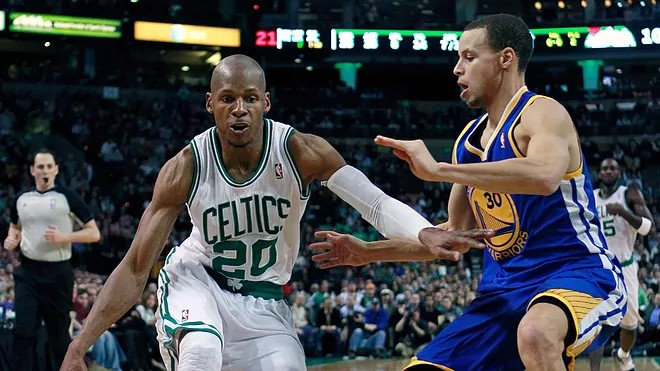

2.1  **3-Pointers vs 2-Pointers**

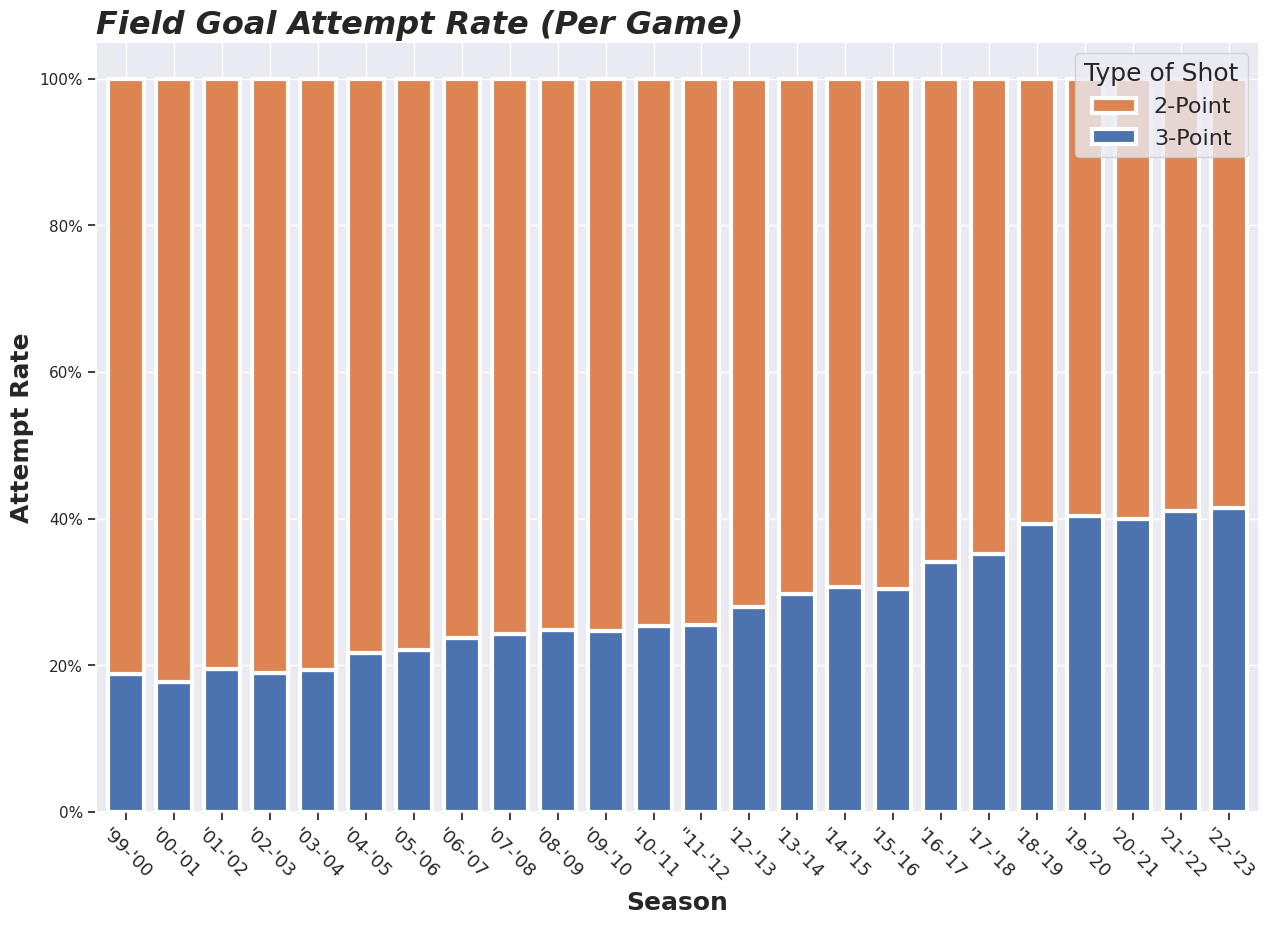

In [34]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.color_palette("tab10")


attempted = player_shooting.groupby('season')\
            [['percent_fga_from_x3p_range', 'percent_fga_from_x2p_range']]\
            .mean()\
            .reset_index()


#plotting
ax = attempted.set_index('season').plot(kind='bar', 
                                   stacked=True,
                                   width = 0.75,
                                   edgecolor = "white", 
                                   linewidth=3)


#formating the ylabels to be percentages instead of decimals
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

#formating the xlabels
ax.set_xticks(range(len(attempted.set_index('season'))))
ax.set_xticklabels(["'99-'00", "'00-'01", "'01-'02", "'02-'03", "'03-'04", "'04-'05", "'05-'06", "'06-'07", "'07-'08", "'08-'09", "'09-'10", "'10-'11", "''11-'12", "'12-'13", "'13-'14", "'14-'15", "'15-'16", "'16-'17", "'17-'18", "'18-'19", "'19-'20", "'20-'21","'21-'22", "'22-'23"], 
                   rotation=-45, 
                   size=13)

#ax.set_yticklabels(size=13)
ax.tick_params(bottom=True, 
               left=True)


ax.axes.set_title('Field Goal Attempt Rate (Per Game)', 
                  fontsize=23, 
                  loc='left', 
                  fontweight='bold', 
                  fontstyle='oblique')
ax.set_xlabel("Season", 
              fontsize=18, 
              fontweight='bold')
ax.set_ylabel("Attempt Rate", 
              fontsize=18, 
              fontweight='bold')

#LEGEND
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), 
          reversed(["3-Point", "2-Point"]), 
          title='Type of Shot', 
          loc='upper right',
          title_fontsize= 18,
          fontsize = 16)

Over the course of the past 20 years, we see a gradual growth of 3s being attempted per game by players. From 1 out of every 5 shots attempted being a 3-pointer in the *1999-2000* season to almost 2 in every 5 shots in the present NBA being a 3. 

To some, this might not be an astronomical jump in shooting rates but it's staggering to see such a jump, especially for on-lookers of the sport who felt the shockwaves of such a change in player output with such things as points per game and Field Goal percentages.

2.1 **Are Players Actually Making These 3s?**

Focusing on Field Goal (FG) percentage did this three-point boom have an effect of how well players where shooting the 3 ball?

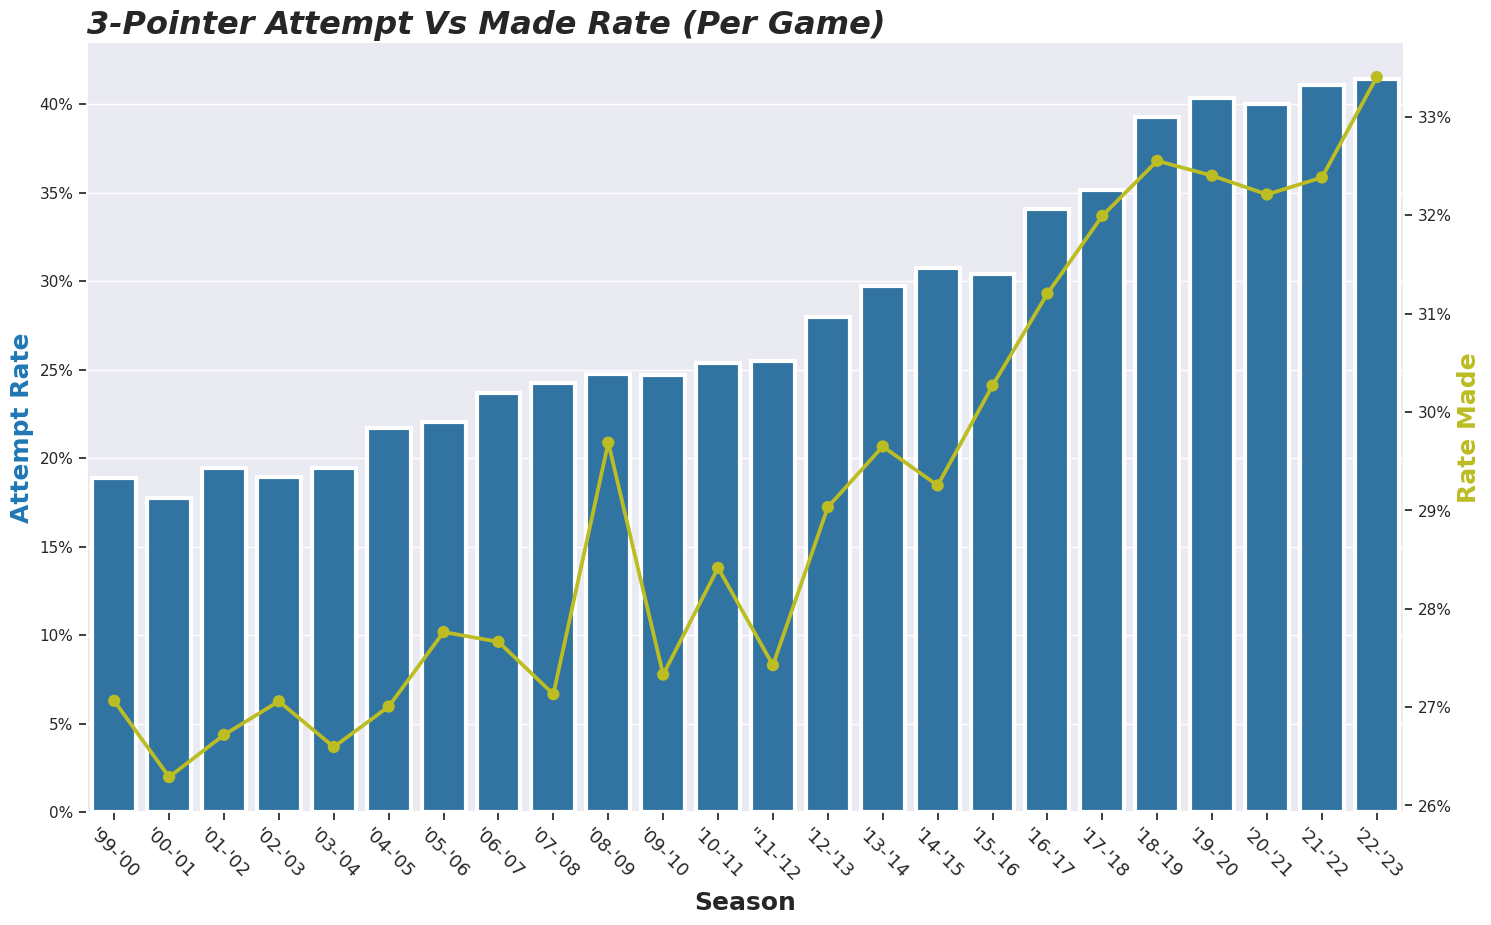

In [35]:
#costumizing plot
fig, ax = plt.subplots(figsize=(17, 10))
sns.set_theme(style="dark", palette='binary')

#plotting
g = sns.barplot(data=player_shooting, 
                x='season', 
                y='percent_fga_from_x3p_range', 
                linewidth=3, 
                errorbar=None, 
                ax=ax, 
                color='tab:blue',
                edgecolor = "white")

ax2 = ax.twinx()
g = sns.pointplot(data=player_shooting, 
                  x='season', 
                  y='fg_percent_from_x3p_range',  
                  errorbar=None, 
                  ax=ax2, 
                  color='tab:olive')


#Title and axes labels
ax.axes.set_title('3-Pointer Attempt Vs Made Rate (Per Game)', 
                  fontsize=23, 
                  loc='left', 
                  fontweight='bold', 
                  fontstyle='oblique')
ax.set_xlabel("Season", 
              fontsize=18, 
              fontweight='bold')
ax.set_ylabel("Attempt Rate", 
              fontsize=18, 
              fontweight='bold', 
              color='tab:blue')
ax2.set_ylabel("Rate Made", 
               fontsize=18, 
               fontweight='bold', 
               color='tab:olive')


#formating the ylabels to be percentages instead of decimals
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

ax.set_xticks(range(24))
ax.set_xticklabels(["'99-'00", "'00-'01", "'01-'02", "'02-'03", "'03-'04", "'04-'05", "'05-'06", "'06-'07", "'07-'08", "'08-'09", "'09-'10", "'10-'11", "''11-'12", "'12-'13", "'13-'14", "'14-'15", "'15-'16", "'16-'17", "'17-'18", "'18-'19", "'19-'20", "'20-'21","'21-'22", "'22-'23"], 
                  rotation=-45, size=13)
ax.tick_params(bottom=True, left=True)

Visually we see something interesting happen with FG percentage as we do with FGA rates as both trend upward as we approach the present. Even while shooting a higher percentage of 3s NBA players maintained and kept up by making their 3s at a high level. 

Looking closely we can also observe an inflection point in the *2014-2015* season, where the rate of 3-pointers made continuously goes upwards with a slight dip that then goes back up in the 2022-2023 season (which exceeds any 3-point made rates in any of the past 20 NBA seasons).

2.2 **3-Point Shot by Position**

Now that we see this from a top-down point of view looking at all players, what kind of effect did the 3-point shot have on each of the five positions in the NBA, each obviously having their own unique strengths and weakness when it comes to shooting the basketball.

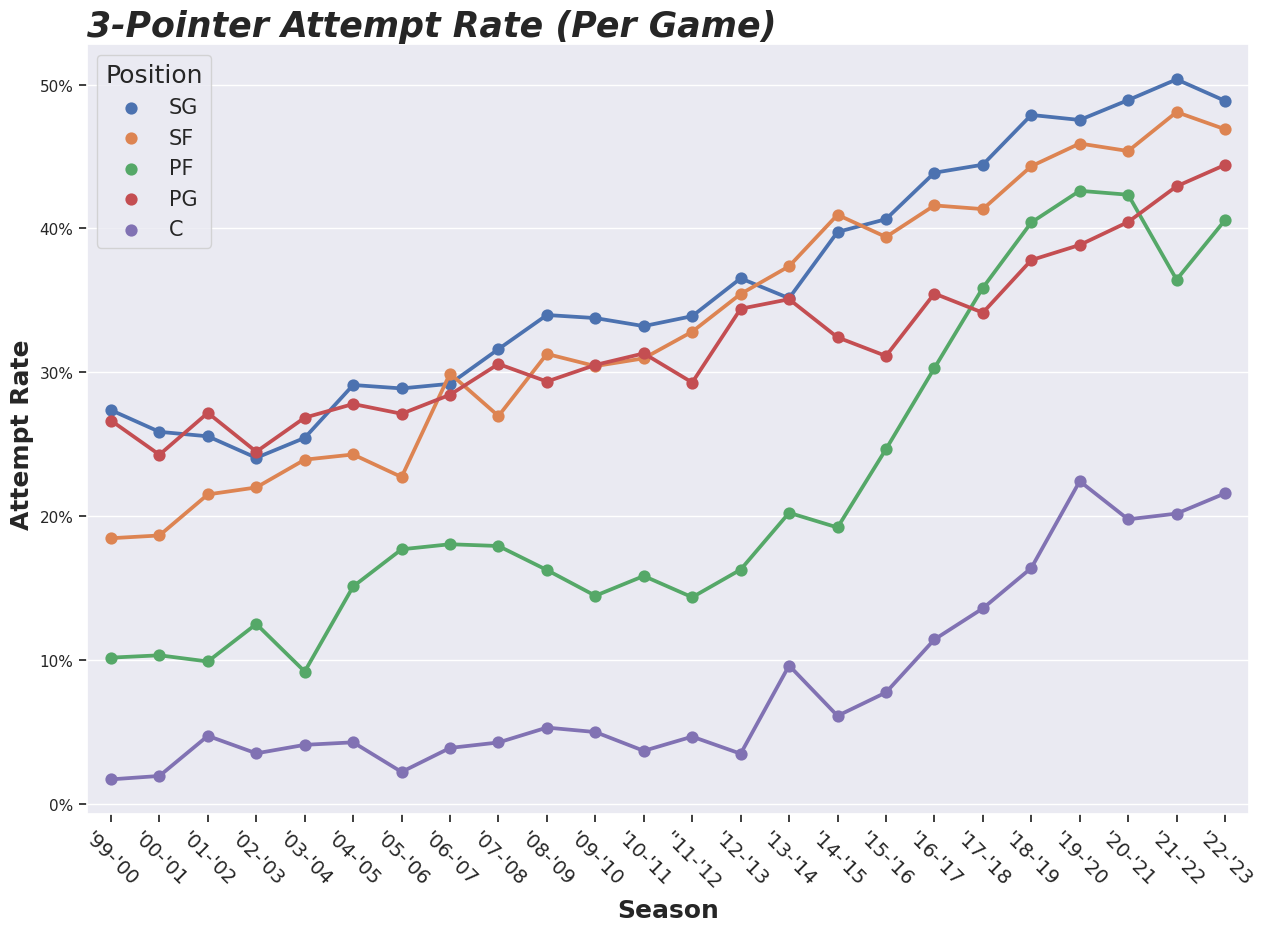

In [36]:
#costumizing plot
sns.set(rc={"figure.figsize":(15, 10)})
sns.set_style("darkgrid")
sns.color_palette("tab10")

#plotting
ax = sns.pointplot(data=player_shooting, 
                   x='season', 
                   y='percent_fga_from_x3p_range',
                   errorbar=None, 
                   hue='Position')


#Labels
ax.axes.set_title("3-Pointer Attempt Rate (Per Game)", 
                  fontsize=25, 
                  loc='left', 
                  fontweight='bold', 
                  fontstyle='oblique')
ax.set_xlabel("Season", 
              fontsize=18, 
              fontweight='bold')
ax.set_ylabel("Attempt Rate ", 
              fontsize=18, 
              fontweight='bold')


#formating the ylabels to be percentages instead of decimals
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

#ticks
ax.set_xticks(range(24))
ax.set_xticklabels(["'99-'00", "'00-'01", "'01-'02", "'02-'03", "'03-'04", "'04-'05", "'05-'06", "'06-'07", "'07-'08", "'08-'09", "'09-'10", "'10-'11", "''11-'12", "'12-'13", "'13-'14", "'14-'15", "'15-'16", "'16-'17", "'17-'18", "'18-'19", "'19-'20", "'20-'21","'21-'22", "'22-'23"], 
                   rotation=-45, 
                   size=14)
ax.tick_params(bottom=True, 
               left=True)


ax.legend(title='Position', 
          loc='upper left', 
          title_fontsize= 18, 
          fontsize = 15)

Initially, at the start of the millennia we see the 3 positions with most long-range shooting proficiency **(see next graph)** Point Guards (PG), Shooting Guards (SG), and Small Forwards (SF) maintain high rates of 3-Point attempts ranging from about 20% to 30% per game. The two remaining positions, Centers (C) and Power Forwards (PF) start the millennia shooting an incredibly low rate of 3s with PFs shooting them at a rate of about 10% per game and Cs closer to 2%. 

As time progresses we see not only a spike in attempts for PGs, SGs, and SFs as one would expect with players with the skill set to do so but also from PFs and Cs who historically are opposites from a shooting skills standpoint. PFs would go on to shoot 3s at a rate of past 40% per game in some seasons while Cs who would barely attempt a 3-Pointers in the early 2000s now shot them at a rate just above 20% per game.

For folks who watch NBA basketball regularly this change can be seen on the court with the last two winners of the NBA MVP award being 2 Centers (Joel Embiid and Nikola Jokic) who shot an extensive amount of 3s in each of their MVP-winning seasons and even before.

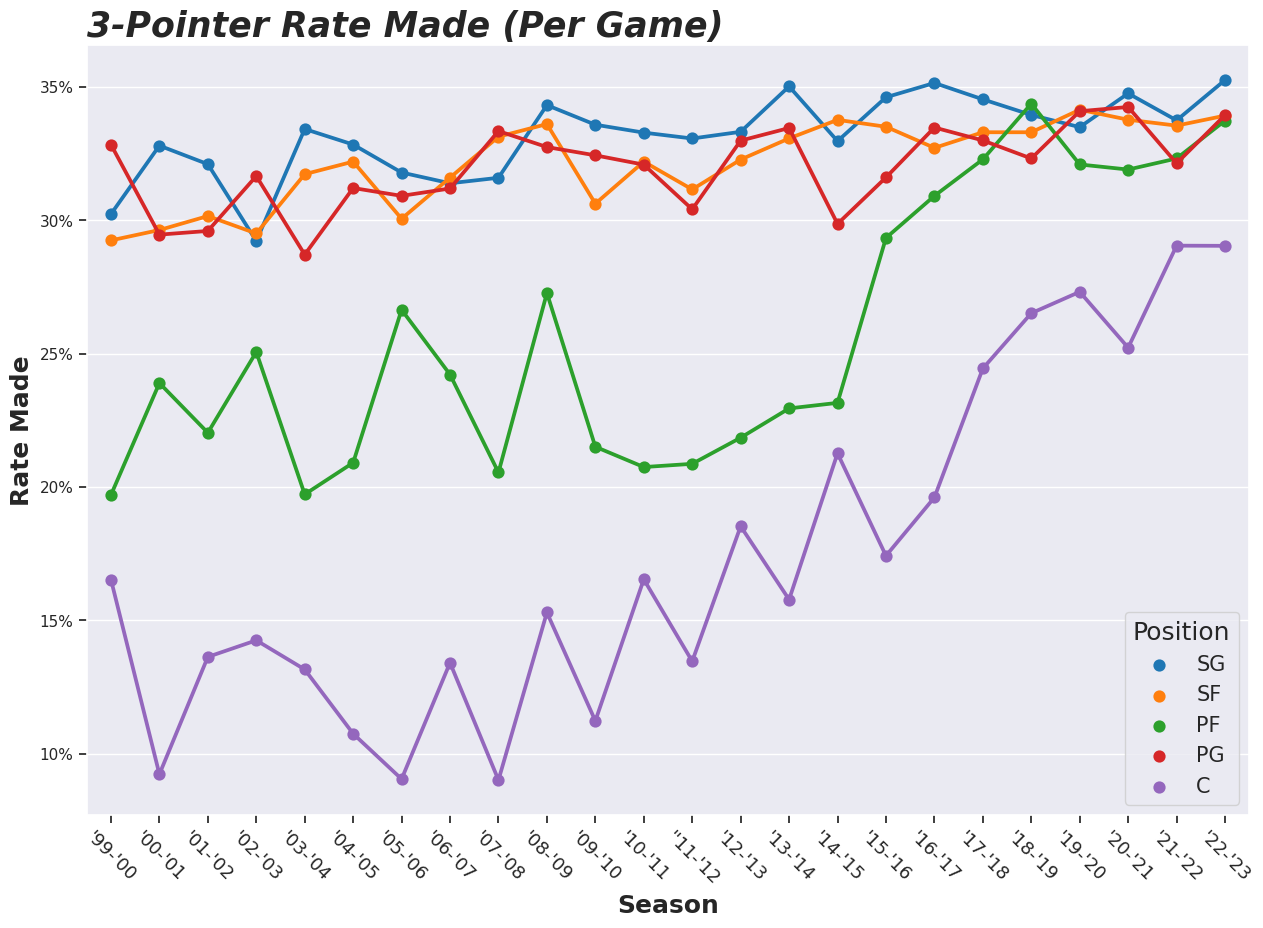

In [37]:
#costumizing plot
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_theme(style="darkgrid", palette="tab10")

#plotting
g = sns.pointplot(data=player_shooting, 
                  x='season', 
                  y='fg_percent_from_x3p_range', 
                  errorbar=None, 
                  hue='Position', 
                  ax=ax)
#ax2 = ax.twinx()
#g = sns.barplot(data=nba_shooting, x='season', y='percent_fga_from_x3p_range', hue='Position', linewidth=1, ci=None, ax=ax2)

ax.axes.set_title('3-Pointer Rate Made (Per Game)', 
                  fontsize=25, 
                  loc='left', 
                  fontweight='bold', 
                  fontstyle='oblique')
ax.set_xlabel("Season", 
              fontsize=18, 
              fontweight='bold')
ax.set_ylabel("Rate Made", 
              fontsize=18, 
              fontweight='bold')


#formating the ylabels to be percentages instead of decimals
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
#ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

ax.set_xticks(range(24))
ax.set_xticklabels(["'99-'00", "'00-'01", "'01-'02", "'02-'03", "'03-'04", "'04-'05", "'05-'06", "'06-'07", "'07-'08", "'08-'09", "'09-'10", "'10-'11", "''11-'12", "'12-'13", "'13-'14", "'14-'15", "'15-'16", "'16-'17", "'17-'18", "'18-'19", "'19-'20", "'20-'21","'21-'22", "'22-'23"], 
                   rotation=-45, 
                   size=13)
ax.tick_params(bottom=True, 
               left=True)

#Legend
ax.legend(title='Position', 
          loc='lower right',
          title_fontsize= 18,
          fontsize = 15)

Looking at the rate at which player was actually making 3s it's not surprising to see PGs, SGs, and SFs shooting at such a high rate but what's more surprising is PFs and Cs catching up with their shorter and quicker counterparts in the 3-point making department.

2.3 **Is there actually any team success coming from shooting more 3s?**

Using “Playoff appearances” by a team as our metric of success (making the playoffs signifies you are one of the top 8 teams in your respective Conference) I've illustrated the number of attempts from the 3-point range for a team that made the playoffs in that specific season and those who did not.

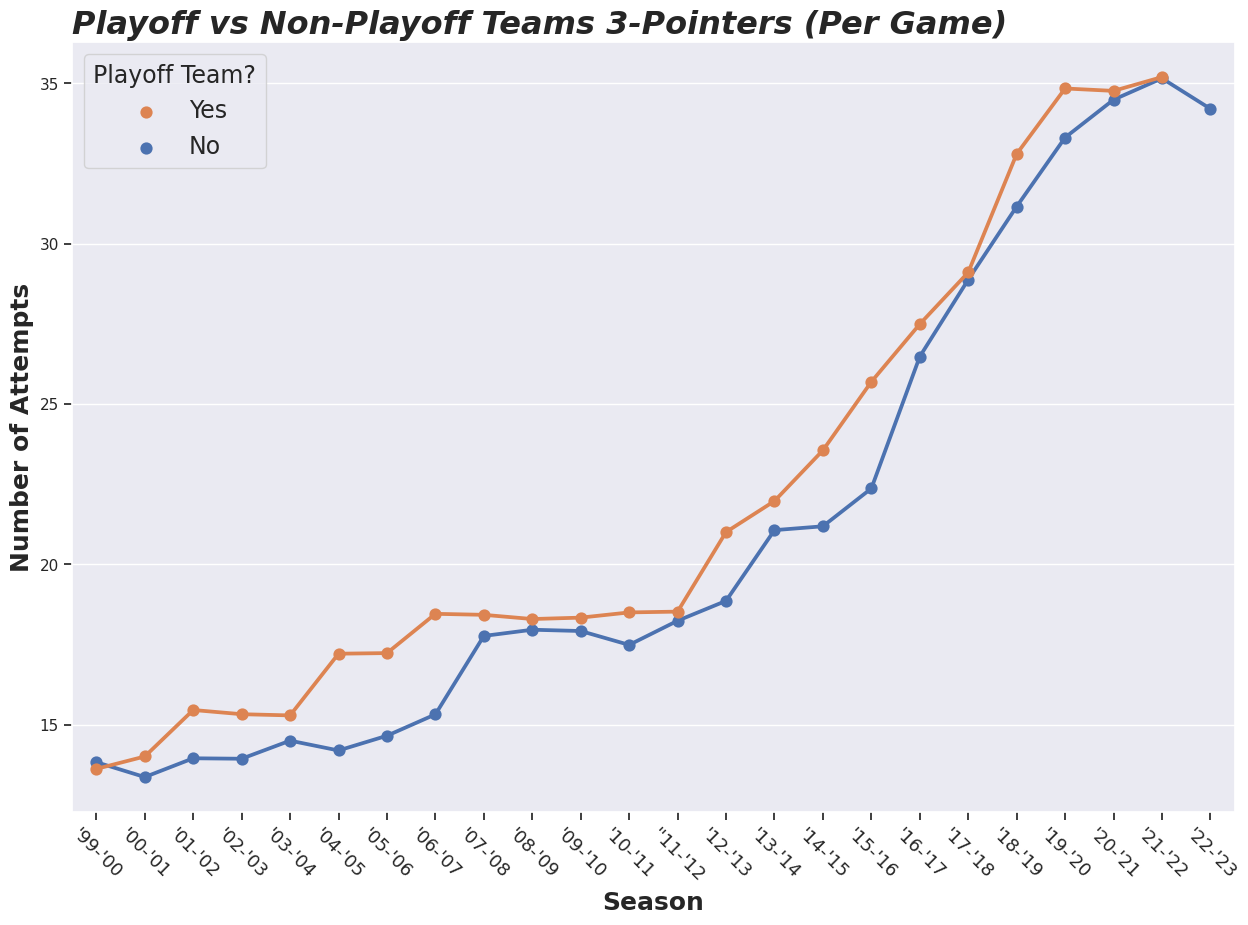

In [38]:
#costumizing plot
sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 10)})

#plotting
ax = sns.pointplot(data=team_totals, 
                   x='season', 
                   y='x3pa_per_game', 
                   hue='playoffs', 
                   errorbar=None)

ax.set_xticks(range(24))
ax.set_xticklabels(["'99-'00", "'00-'01", "'01-'02", "'02-'03", "'03-'04", "'04-'05", "'05-'06", "'06-'07", "'07-'08", "'08-'09", "'09-'10", "'10-'11", "''11-'12", "'12-'13", "'13-'14", "'14-'15", "'15-'16", "'16-'17", "'17-'18", "'18-'19", "'19-'20", "'20-'21","'21-'22", "'22-'23"], 
                  rotation=-45, size=13)
ax.tick_params(bottom=True, 
               left=True)

#Labels
ax.axes.set_title('Playoff vs Non-Playoff Teams 3-Pointers (Per Game)', 
                  fontsize=23, 
                  loc='left', 
                  fontweight='bold', 
                  fontstyle='oblique')
ax.set_xlabel("Season", 
              fontsize=18, 
              fontweight='bold')
ax.set_ylabel("Number of Attempts", 
              fontsize=18, 
              fontweight='bold')

#Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), 
          reversed(["No", "Yes"]), 
          title='Playoff Team?', 
          loc='upper left',
          title_fontsize= 17, 
          fontsize = 17)

From our graph, we see playoffs-making teams continually attempted more 3s than their non-playoff-making counterparts since the beginning of the millennia (even if it's by a small margin).

# **3. Shot Mapping**

3.1 **Shot Frequency**

To get a better understanding of what was happening on the court we can examine shot location data which gives us the ability to map onto a plane all shots attempted during an entire season.

> **Note:** Due to a majority of basketball shots happening directly under or next to the rim, a maximum cutoff for shots was established when visualizing the entire court so hexbins around the rim would not drown out other hexbins. The maximum cut off chosen was 400 shots.

In [39]:
#THE TEMPLATE OF THIS CODE WAS TAKEN FROM . I HAVE ALTERED PARTS OF THE CODE TO WORK WITH THE COORDINATE VALUES IN MY DATASET
#Drawing basketball court
def draw_court(ax=None, color='white', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
        
    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 55), radius=7.5, linewidth=lw, color="black", fill=False)

    # Create backboard
    backboard = Rectangle((-30, 40), 60, -1, linewidth=lw, color=color)

    # The paint
    outer_box = Rectangle((-80, 0), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, 0), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 190), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 190), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 45), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color="black")

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, 0), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, 0), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 50), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    #Center Court
    center_outer_arc = Arc((0, 470), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 470), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, 0), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

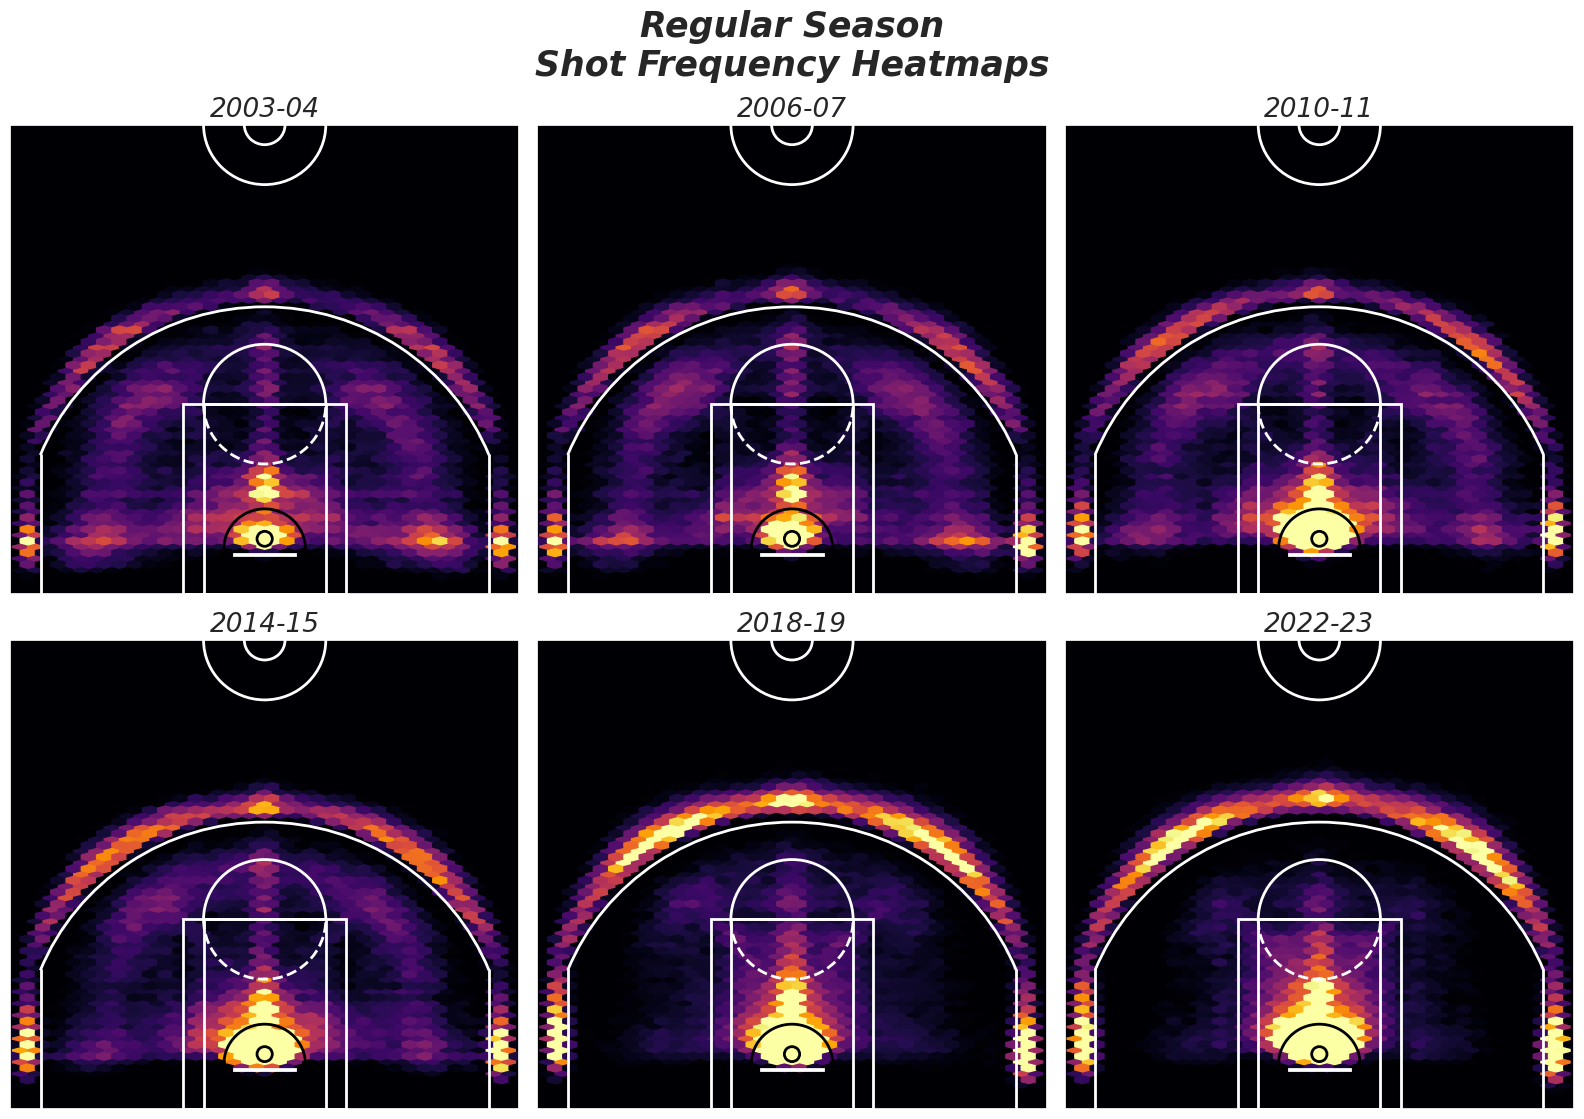

In [40]:
#Setting up plot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,11.4),  sharex=True, sharey=True)
plt.xlim(-250, 250)
plt.ylim(0, 470)


#Ploting each court
#We use larger values than the axis limits to ensure that hexagons go all the way to the boundaries of our draw court              
ax1= ax[0,0].hexbin(shots_04['LOC_X'], 
           shots_04['LOC_Y'], 
           gridsize=(40, 40), 
           extent=(-300, 300, 0, 470), 
           cmap='inferno', 
           vmin=20, 
           vmax=450)

ax2 = ax[0,1].hexbin(shots_07['LOC_X'], 
           shots_07['LOC_Y'], 
           gridsize=(40, 40), 
           extent=(-300, 300, 0, 470), 
           cmap='inferno', 
           vmin=20, 
           vmax=450)

ax3 = ax[0,2].hexbin(shots_11['LOC_X'], 
           shots_11['LOC_Y'], 
           gridsize=(40, 40), 
           extent=(-300, 300, 0, 470), 
           cmap='inferno', 
           vmin=20, 
           vmax=450)

ax4 = ax[1,0].hexbin(shots_15['LOC_X'], 
           shots_15['LOC_Y'], 
           gridsize=(40, 40), 
           extent=(-300, 300, 0, 470), 
           cmap='inferno', 
           vmin=20, 
           vmax=450)

ax5 = ax[1,1].hexbin(shots_19['LOC_X'], 
           shots_19['LOC_Y'], 
           gridsize=(40, 40), 
           extent=(-300, 300, 0, 470), 
           cmap='inferno', 
           vmin=20, 
           vmax=450)

ax6 = ax[1,2].hexbin(shots_23["LOC_X"], 
           shots_23["LOC_Y"], 
           gridsize=(40, 40), 
           extent=(-300, 300, 0, 470), 
           cmap="inferno", 
           vmin=20, 
           vmax=450)

#Add labels to each court image
ax[0, 0].set_title('2003-04', fontsize=19, fontweight='medium', fontstyle='oblique')
ax[0, 1].set_title('2006-07', fontsize=19, fontweight='medium', fontstyle='oblique')
ax[0, 2].set_title('2010-11', fontsize=19, fontweight='medium', fontstyle='oblique')
ax[1, 0].set_title('2014-15', fontsize=19, fontweight='medium', fontstyle='oblique')
ax[1, 1].set_title('2018-19', fontsize=19, fontweight='medium', fontstyle='oblique')
ax[1, 2].set_title('2022-23', fontsize=19, fontweight='medium', fontstyle='oblique')

#Costimizing axis ticks and adding courts
for row in range(2):
    for col in range(3):
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)
        draw_court(ax[row,col])
        
        
fig.suptitle("Regular Season\nShot Frequency Heatmaps", fontsize=25, fontweight='bold', fontstyle='oblique')
fig.tight_layout()
plt.show()

From charts of the *2003-2004* season to that of *2022-2023* season we see a gradual movement away from the mid-range shot (long 2-pointer) to an increase in 3-pointers as the years went on. Alongside the increase in 3s, there was also an increase in shots concentrating around the ring pointing to a polarity in shot selection for players; in their minds, it's either I shot a 3-Pointer or I take a more efficient/easier shot around the rim.


The death of the midrange (long 2-pointer) shot is clear to see here with the heat map showing shot regions from the *2003-04* season being brighter in the space between the 3-Point line and the key (aka the paint). That brightness/volume shot volume then slowly starts to migrate further and further.

3.2 **Shot Distance Distribution**

What interesting things can we discover if we visualize the percentage of shots taken from specific shot distances?

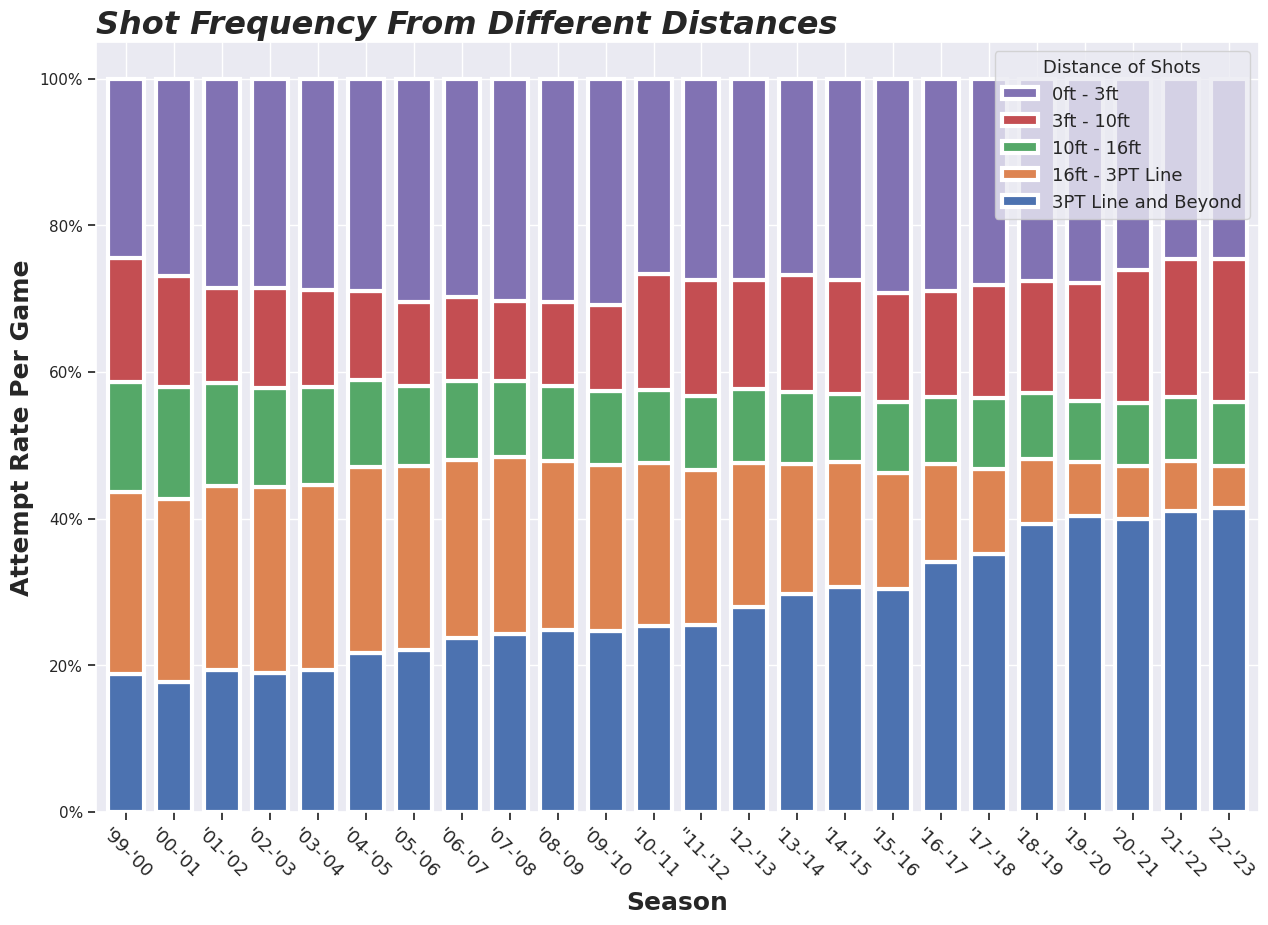

In [41]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.color_palette("tab10")
sns.set(font_scale=1)

attempted = player_shooting.groupby('season')\
            [['percent_fga_from_x3p_range', 'percent_fga_from_x16_3p_range','percent_fga_from_x10_16_range',  'percent_fga_from_x3_10_range', 'percent_fga_from_x0_3_range']]\
            .mean()\
            .reset_index()

#plotting
ax = attempted.set_index('season').plot(kind='bar', 
                                   stacked=True,  
                                   width = 0.75, 
                                   edgecolor = "white", 
                                   linewidth=3)

#Y-AXIS
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

#X-AXIS
ax.set_xticks(range(len(attempted.set_index('season'))))
ax.set_xticklabels(["'99-'00", "'00-'01", "'01-'02", "'02-'03", "'03-'04", "'04-'05", "'05-'06", "'06-'07", "'07-'08", "'08-'09", "'09-'10", "'10-'11", "''11-'12", "'12-'13", "'13-'14", "'14-'15", "'15-'16", "'16-'17", "'17-'18", "'18-'19", "'19-'20", "'20-'21","'21-'22", "'22-'23"], 
                   rotation=-45, 
                   size=13)
ax.tick_params(bottom=True, 
               left=True)

#LABELS
ax.axes.set_title('Shot Frequency From Different Distances', 
                  fontsize=23, 
                  loc='left', 
                  fontweight='bold', 
                  fontstyle='oblique')
ax.set_xlabel("Season", 
              fontsize=18, 
              fontweight='bold')
ax.set_ylabel("Attempt Rate Per Game", 
              fontsize=18, 
              fontweight='bold')


#LEGEND
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), 
          reversed(["3PT Line and Beyond", "16ft - 3PT Line", "10ft - 16ft", "3ft - 10ft", "0ft - 3ft"]), 
          title='Distance of Shots', 
          loc='upper right',
          title_fontsize= 13,
          fontsize = 13)

Looking into the percentage of shots attempted from certain distances on the court one can see most shot rates from certain distances staying around a similar percentage range while one in particular almost being gone completely. The "16ft to 3-Point line shot (24ft)" is almost going extinct with the boom of the 3-Point shot eating away at shots that would be taken at that distance historically. 

That being said the mid-range shot (long 2-pointer) isn't necessarily dead as stars like Kevin Durant, Demar Derozan, and Devin Booker are still known for incorporating such a shot into their arsenal.

3.3 **Jokić vs Shaq**

The difference in shot selection for players is made even more evident by just looking at the shot selection of the most dominant *Centers* from their respective eras, Shaquille O'Neal and Nikola Jokić.

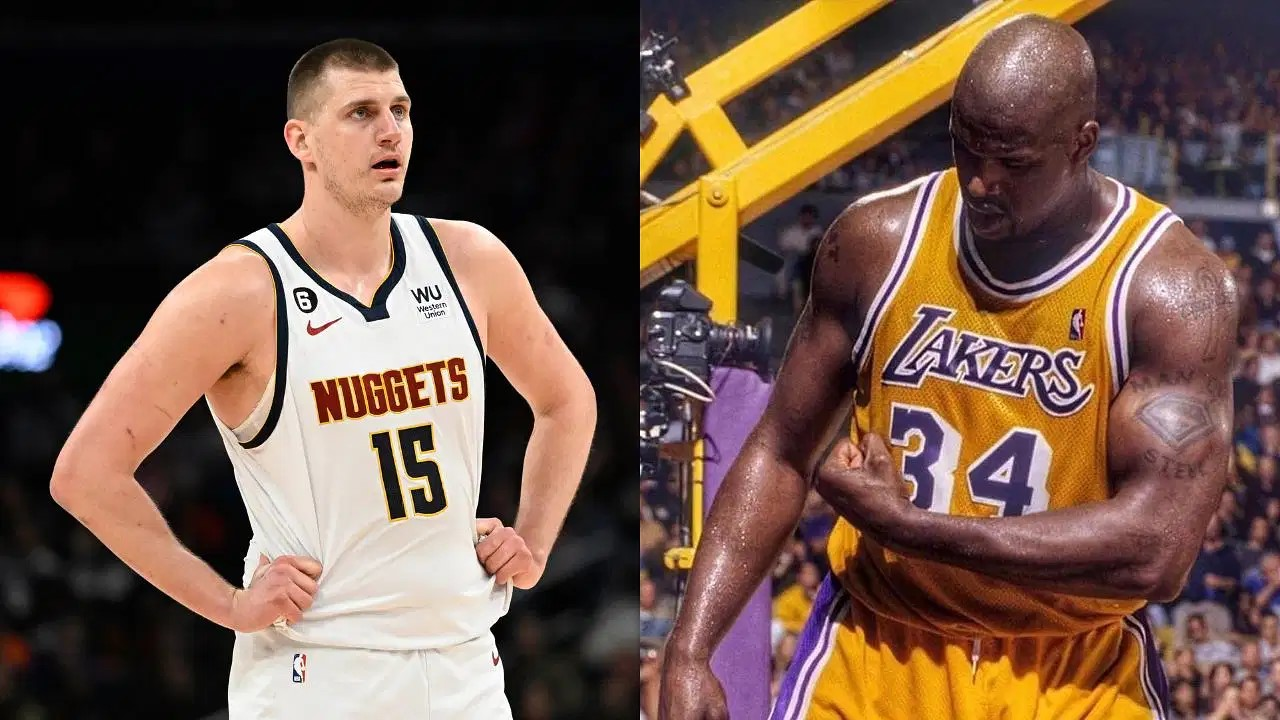

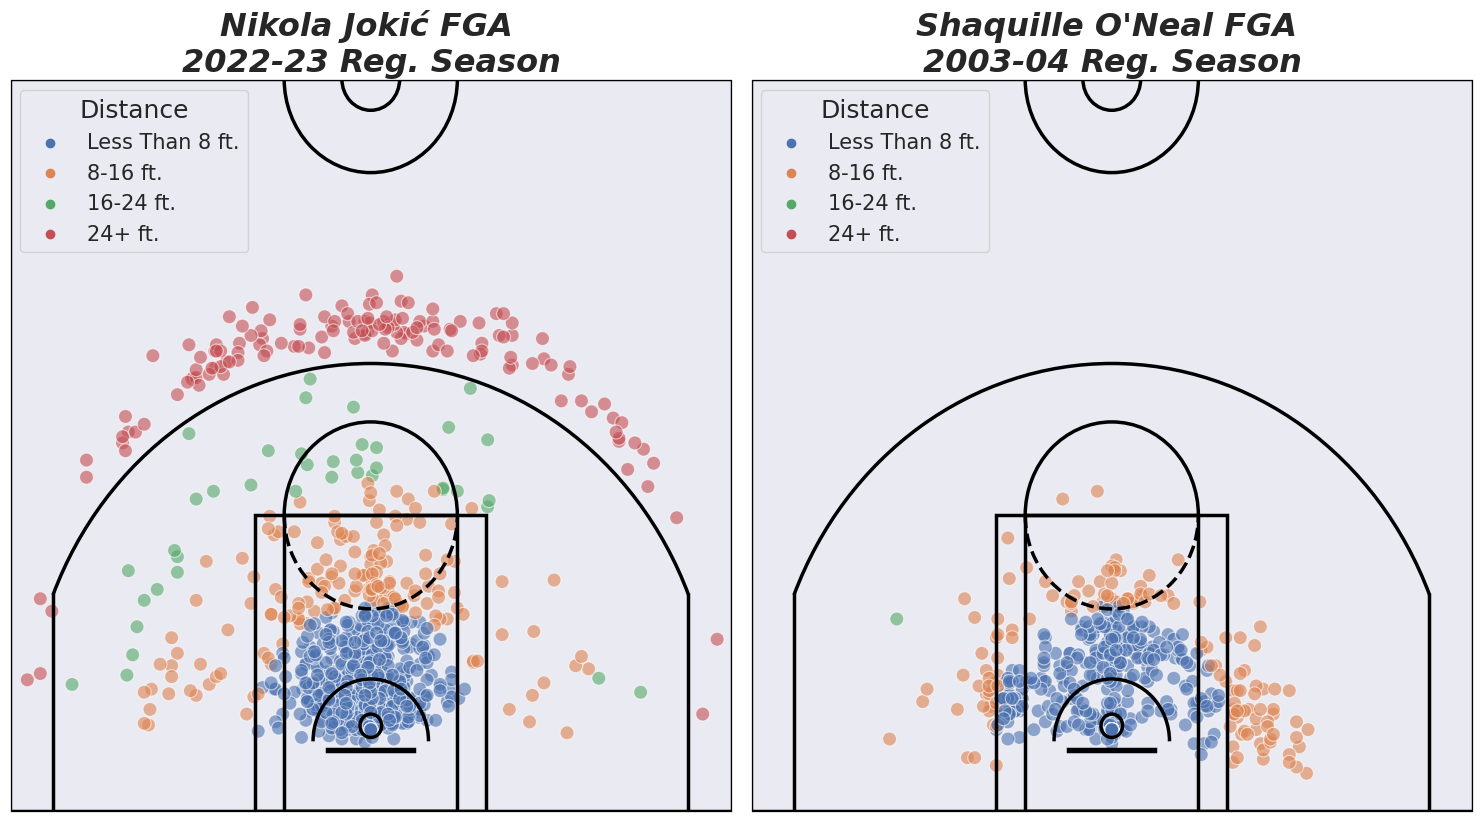

In [42]:
#########################################################################################
shaq_04 = shots_04.query('PLAYER_ID == 406 & ZONE_RANGE != "Back Court Shot"')
jokic_23 = shots_23.query('PLAYER_NAME == "Nikola Jokic" & ZONE_RANGE != "Back Court Shot"')

#Setting up subplots
fig, ax = plt.subplots(ncols=2, figsize=(15,8.4),  sharex=True, sharey=True)
sns.set_theme(style="dark")


#Ploting our p[oints]
sns.scatterplot(data = shaq_04, 
                x='LOC_X', 
                y='LOC_Y',  
                hue='ZONE_RANGE', 
                hue_order=['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.'], 
                alpha=0.6, 
                s=100,
                ax=ax[1])

sns.scatterplot(data = jokic_23, 
                x='LOC_X', 
                y='LOC_Y',  
                hue='ZONE_RANGE', 
                hue_order=['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.'], 
                alpha=0.6, 
                s=100,
                ax=ax[0])


#Add labels to each court image
ax[1].set_title("Shaquille O'Neal FGA \n2003-04 Reg. Season", 
                fontsize=23, 
                fontweight='bold', 
                fontstyle='oblique')

ax[0].set_title("Nikola Jokić FGA \n2022-23 Reg. Season", 
                fontsize=23, 
                fontweight='bold', 
                fontstyle='oblique')

#Legends
ax[1].legend(title='Distance',
             loc='upper left',
             title_fontsize= 18,
             fontsize = 15)

ax[0].legend(title='Distance',
             loc='upper left',
             title_fontsize = 18,
             fontsize = 15)

#Costimizing
for col in range(2):
    ax[col].get_xaxis().set_visible(False)
    ax[col].get_yaxis().set_visible(False)
    draw_court(ax[col], color='black', outer_lines=True, lw=2.5)


fig.tight_layout()
plt.xlim(-250, 251)
plt.ylim(-1, 470)
fig.show()

Let us admire the singular green dot in Shaq's shot chart.

# **4. Building A Scouting Report (Past vs Present)**

Now we'll take a more granular look at how shooting habits have changed over time (after comparing and picking a machine learning model) to build a visual scouting report to compare LeBron James’s strongest shooting locations/habits and how they've evolved over the years. 

Why pick Lebron James for this evaluation? Well, he provides us with a very unique look into a player that still plays at the relatively same pace and efficiency today as he did in the early 2000s when he started his NBA career. Still averaging 25+ points per game in his 21st season he's found ways to evolve his playstyle with the times making him a perfect candidate for our comparison. 

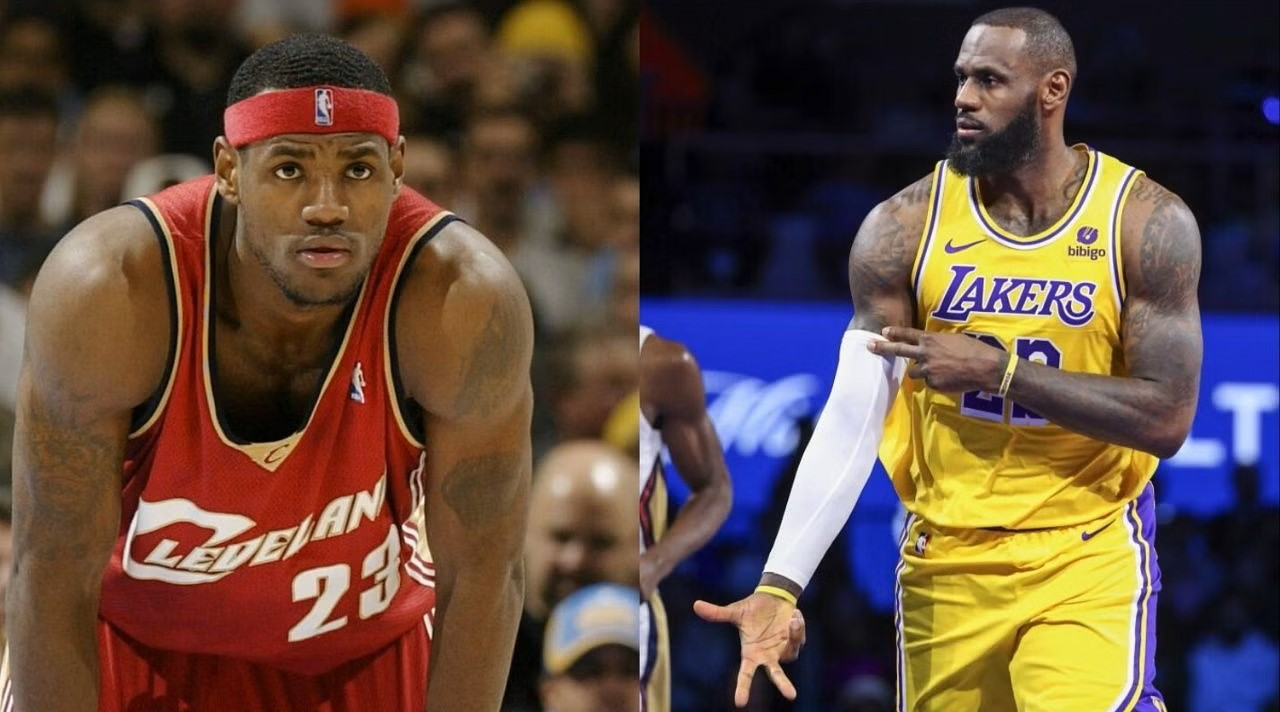

4.1 **Comparing Classification Models**

Let's start the process of building and comparing different classification models with default parameters that can show us how LeBron's hotspots and efficiency have changed from certain locations on the court; specifically, what are his favorite and most efficient shooting locations today vs his rookie year.

In the table below we'll see an example of the Features we'll be using to train and test our models.

In [80]:
lebron_04 = shots_04.query('PLAYER_NAME == "LeBron James" & ZONE_RANGE != "Back Court Shot"')
lebron_23 = shots_23.query('PLAYER_NAME == "LeBron James" & ZONE_RANGE != "Back Court Shot"')


#Getting DataFrame ready for preprocessing by removing remaining columns we don't need
lebron04_ml = lebron_04.drop(["SEASON_2", "TEAM_NAME", "PLAYER_ID", "PLAYER_NAME", "EVENT_TYPE", 
                              "SHOT_TYPE", "ZONE_NAME", "ZONE_ABB", "ZONE_RANGE", "QUARTER", "MINS_LEFT", 
                              "SECS_LEFT", "BASIC_ZONE", "ACTION_TYPE"], 
                             axis=1, 
                             inplace=False)

lebron23_ml = lebron_23.drop(["SEASON_2", "TEAM_NAME", "PLAYER_ID", "PLAYER_NAME", "EVENT_TYPE", 
                              "SHOT_TYPE", "ZONE_NAME", "ZONE_ABB", "ZONE_RANGE", "QUARTER", "MINS_LEFT", 
                              "SECS_LEFT", "BASIC_ZONE", "ACTION_TYPE"], 
                             axis=1, 
                             inplace=False)

#Label Enconding the Categorical columns
#columns = ["ACTION_TYPE"]
#for col in columns:
    #le = LabelEncoder()
    #label = le.fit_transform(lebron23_ml[col])
    #label
    #lebron23_ml.loc[:, col] = label
    
#Reordering columns to have our dependent variable at the end
#lebron23_ml = lebron23_ml[['LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT', 'SHOT_MADE']]

lebron23_ml

LOC_X  LOC_Y  SHOT_DISTANCE  SHOT_MADE
116361   37.0  310.5             26          0
116363  -18.0  212.5             16          0
116364   70.0  143.5             11          0
116368   26.0   68.5              3          1
116378 -229.0   65.5             22          0
...       ...    ...            ...        ...
123626   -5.0   71.5              1          1
123637   67.0  295.5             25          1
123642  -12.0  308.5             25          0
123649  -20.0  108.5              5          0
123653   29.0  305.5             25          1

[1167 rows x 4 columns]

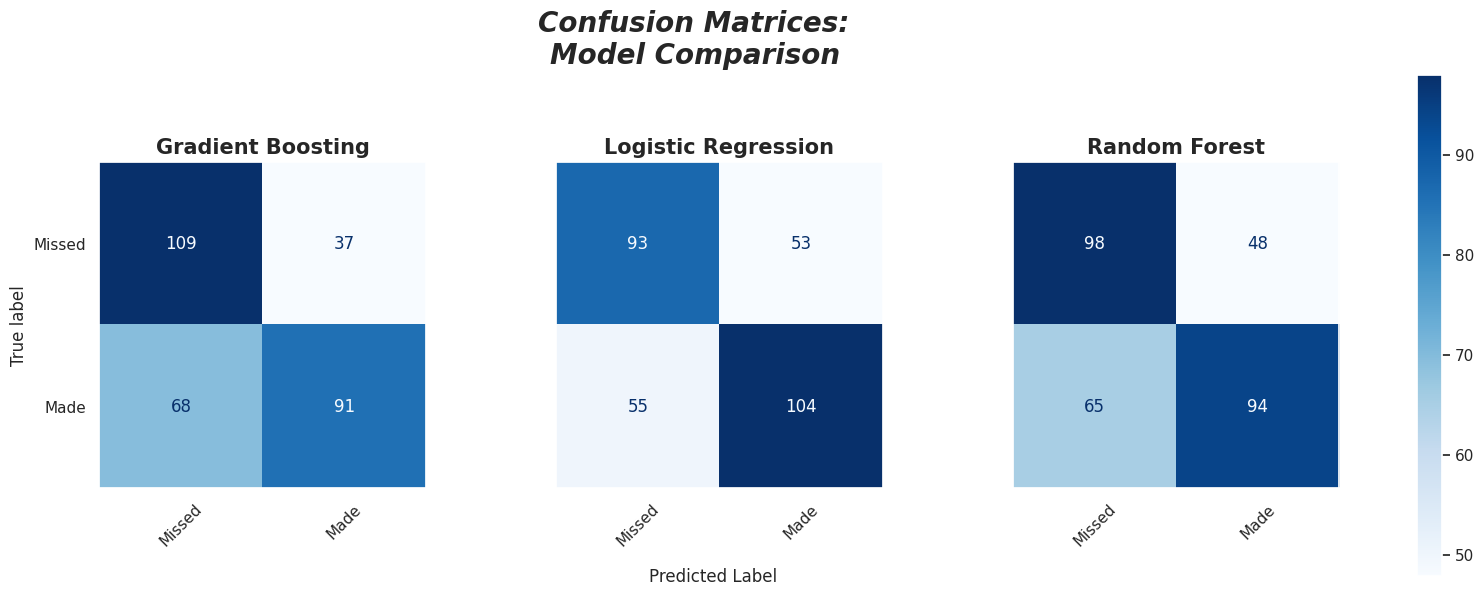

In [44]:
############################################ MATRIX ###################################################
#Features
X = lebron23_ml.iloc[:, :-1].values
#Labels
y = lebron23_ml.iloc[:, -1].values

#Splitting training set into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6.5), sharey='row')
class_models = {"Gradient Boosting": GradientBoostingClassifier(), 
                "Logistic Regression": LogisticRegression(class_weight='balanced'),
                "Random Forest": RandomForestClassifier()}

#https://stackoverflow.com/questions/61825227/plotting-multiple-confusion-matrix-side-by-side
for i, (key, class_models) in enumerate(class_models.items()):
    y_pred = class_models.fit(X_train, y_train).predict(X_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), 
                                  display_labels=['Missed', 'Made'])
    disp.plot(ax=axes[i], xticks_rotation=45, cmap='Blues')
    disp.ax_.set_title(key, fontsize=15, fontweight='bold')
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

fig.text(0.4, 0.1, 'Predicted Label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=1)
fig.suptitle("Confusion Matrices:\nModel Comparison ", fontsize=20, fontweight='bold', fontstyle='oblique', ha='right')
fig.colorbar(disp.im_, ax=axes)
fig.set_tight_layout(False)
fig.show()

In [45]:
#Features
X = lebron23_ml.iloc[:, :-1].values
#Labels
y = lebron23_ml.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

############################################# MODEL PERFORMANCE ########################################
class_models = {"Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1), 
                "Logisitic Regression": LogisticRegression(),
                "Random Forest": RandomForestClassifier()}

# Train and evaluate each classifier
results = {'Classification Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for clf_name, clf in class_models.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    #Feature Scaling after we split our data into Train and Test sets would affect KNN too much (KILLS GB)
    #sc = StandardScaler()
    #X_train = sc.fit_transform(X_train)   
    #X_test = sc.transform(X_test)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the classifier
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)

    # Save results
    results['Classification Models'].append(clf_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
results_df.set_index('Classification Model', inplace=True)
results_df.sort_values(by='Accuracy', ascending=False)
results_df.style.highlight_max(color = 'lightgreen', axis = 0)

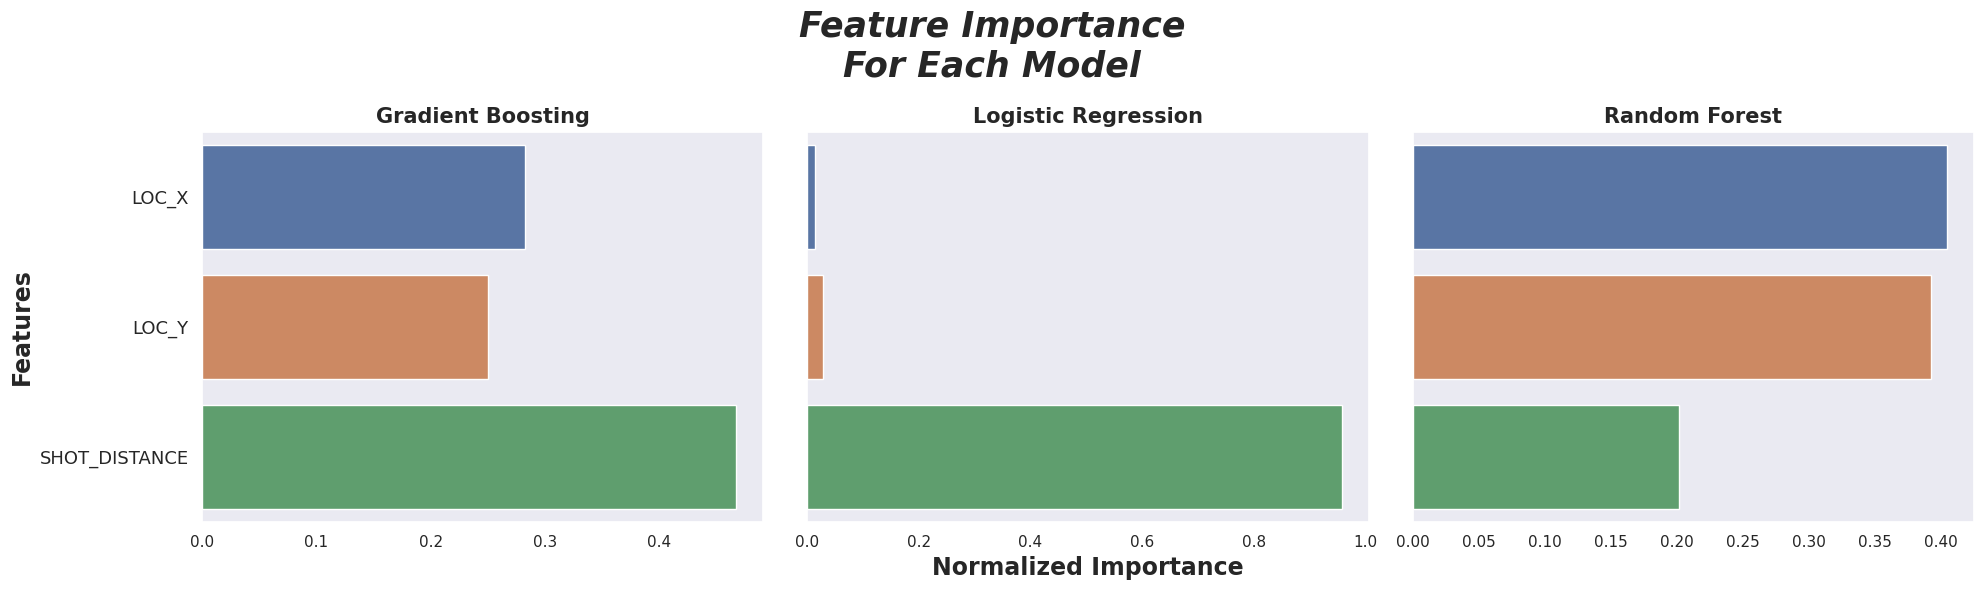

In [46]:
############################################# FEATURE IMPORTANCE ########################################
#Features
X = lebron23_ml.iloc[:, :-1].values
#Labels
y = lebron23_ml.iloc[:, -1].values

#Splitting training set into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Convert X_train to a DataFrame with column names
columns = [f'feature_{i+1}' for i in range(X_train.shape[1])]
X_train_df = pd.DataFrame(X_train, columns=columns)

# reanming the DataFrame columns
X_train_df.rename(columns = {"feature_1":"LOC_X", 
                             "feature_2":"LOC_Y", 
                             "feature_3":"SHOT_DISTANCE"}, 
                  inplace = True)  
                             

# Initialize classifiers
models = [GradientBoostingClassifier(), 
          LogisticRegression(class_weight='balanced'),  
          RandomForestClassifier(random_state=0)]

model_names = ["Gradient Boosting",
               "Logistic Regression",
               "Random Forest"]

#Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(20, 6), sharey='row')

# Plot feature importance for each classifier
for i, (model, name) in enumerate(zip(models, model_names)):
    model.fit(X_train, y_train)
    
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importance = np.abs(model.coef_[0])
    else:
        # K-Nearest Neighbors doesn't have direct feature importance
        importance = None

    if importance is not None:
        # Normalize the importance values for better comparison
        importance = importance / np.sum(importance)
        
        # Plot the bar chart
        sns.barplot(x=importance, y=X_train_df.columns, ax=axes[i])
        axes[i].set_title(f'{name}', fontsize=15, fontweight='bold')
        axes[1].set_xlabel('Normalized Importance', fontsize=17, fontweight='bold')
        
        # Explicitly set x-axis labels
        axes[i].set_yticks(np.arange(len(importance)))
        axes[i].set_yticklabels(X_train_df.columns, rotation=0, fontsize=13, ha='right')
        axes[0].set_ylabel('Features', fontsize=17, fontweight='bold')

fig.suptitle("Feature Importance\nFor Each Model", fontsize=25, fontweight='bold', fontstyle='oblique')       
plt.tight_layout()
plt.show()

Gradient Boosted Trees is the model we'll use as it boasts the highest Accuracy (66%) and Precision (71%) score (even if minimal) of all the classification models tested even before we tune up our parameters for our specific GB model.

<br>

If we do wanna get the most out of our Gradient Boosted model we can compare the different learning rates for our models while our *n_estimators* parameter equals 100 throughout all versions. Comparing them below we see the model peaks at a learning rate = 0.03 which boasts the highest Accuracy (68%) and Precision (76%) score.

In [47]:
class_models = {"Learning Rate = 0.01": GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, random_state=0), 
                "Learning Rate = 0.02": GradientBoostingClassifier(n_estimators=100, learning_rate=0.02, random_state=0), 
                "Learning Rate = 0.03": GradientBoostingClassifier(n_estimators=100, learning_rate=0.03, random_state=0),
                "Learning Rate = 0.04": GradientBoostingClassifier(n_estimators=100, learning_rate=0.04, random_state=0), 
                "Learning Rate = 0.05": GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=0),
                "Learning Rate = 0.06": GradientBoostingClassifier(n_estimators=100, learning_rate=0.06, random_state=0),
                "Learning Rate = 0.07": GradientBoostingClassifier(n_estimators=100, learning_rate=0.07, random_state=0),
                "Learning Rate = 0.08": GradientBoostingClassifier(n_estimators=100, learning_rate=0.08, random_state=0),
                "Learning Rate = 0.09": GradientBoostingClassifier(n_estimators=100, learning_rate=0.09, random_state=0),
                "Learning Rate = 0.10": GradientBoostingClassifier(n_estimators=100, learning_rate=0.10, random_state=0)}

# Train and evaluate each classifier
results = {'Gradient Boosting Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for clf_name, clf in class_models.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    #Feature Scaling after we split our data into Train and Test sets would affect KNN too much 
    #sc = StandardScaler()
    #X_train = sc.fit_transform(X_train)   
    #X_test = sc.transform(X_test)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the classifier
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)

    # Save results
    results['Gradient Boosting Classifier'].append(clf_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
results_df.set_index('Gradient Boosting Classifier', inplace=True)
results_df.sort_values(by='Accuracy', ascending=False)
results_df.style.highlight_max(color = 'lightgreen', axis = 0)

4.2  **Lebron 2004**

Lets first take a look at some of the differences in Lebron's shooting patterns and habits from 2003 (his rookie season) and 2023 with a raw shot chart.

<Figure size 1500x940 with 0 Axes>

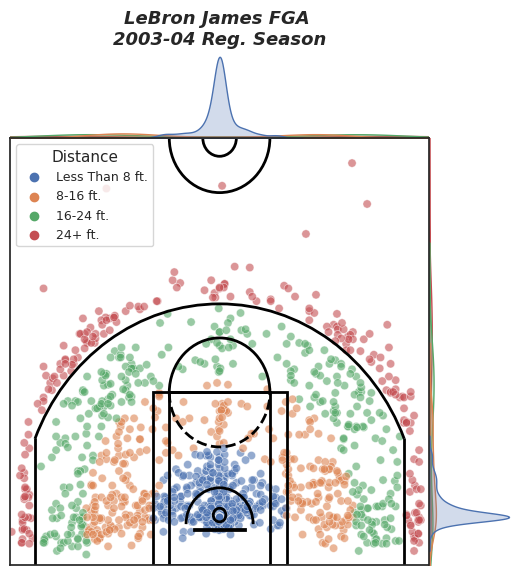

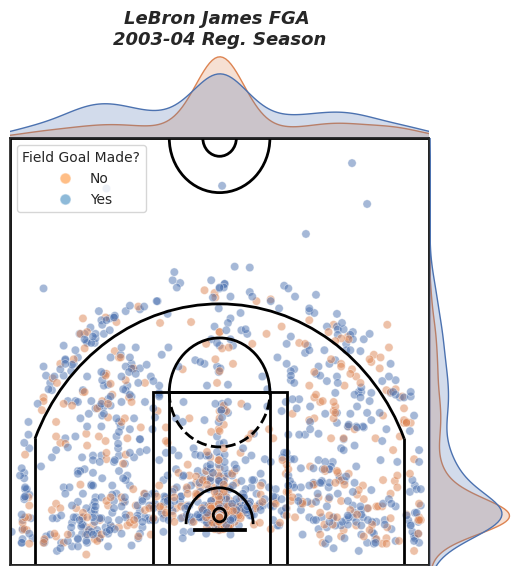

In [48]:
#########################################################################################
#setting up seaborn plot
sns.set_style("white")
sns.set_color_codes()
fig = plt.figure(figsize=(15,9.4))

#Plotting
ax = sns.jointplot(data = lebron_04, 
                   x='LOC_X', 
                   y='LOC_Y', 
                   kind='scatter', 
                   hue='ZONE_RANGE', 
                   hue_order=['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.'], 
                   space=0, 
                   alpha=0.6)


#Court and axes
draw_court(outer_lines=False, color="black")
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlim(-250, 250)
plt.ylim(0, 470)

#Title
plt.title('LeBron James FGA \n2003-04 Reg. Season', 
          fontsize=13,
          loc='center',
          fontweight='bold',
          y=1.2, 
          fontstyle='oblique')

#Legend
plt.legend(title='Distance',
          loc='upper left',
          title_fontsize= 11,
          fontsize = 9)

#######################################################################################
#Plotting
g = sns.jointplot(data = lebron_04, 
                   x='LOC_X', 
                   y='LOC_Y', 
                   kind='scatter',
                   hue='SHOT_MADE',
                   space=0, 
                   alpha=0.5)

#Court and axes
draw_court(outer_lines=True, color="black")
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlim(-250, 250)
plt.ylim(0, 470)

#Title
plt.title('LeBron James FGA \n2003-04 Reg. Season', 
          fontsize=13,
          loc='center',
          fontweight='bold',
          y=1.2, 
          fontstyle='oblique')

from matplotlib.lines import Line2D
#Legend
legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:orange', markersize=8, alpha=0.5, label='No'),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:blue', markersize=8, alpha=0.5,  label='Yes')]
g.ax_joint.legend(handles=legend_labels, title='Field Goal Made?', loc='upper left', title_fontsize=10, fontsize=10)


plt.show()

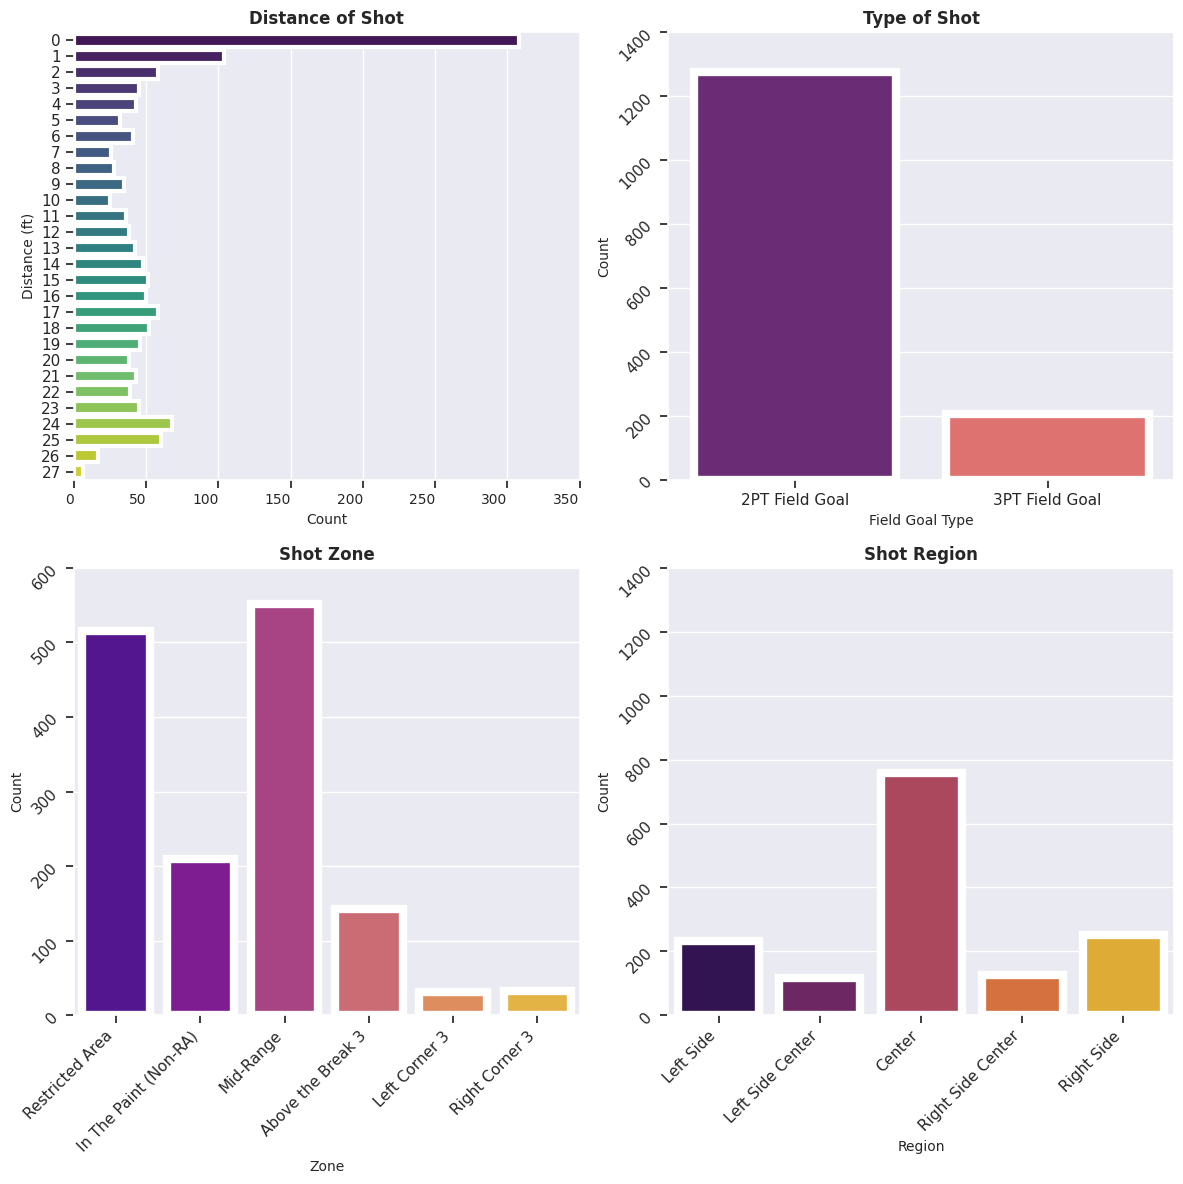

In [117]:
#Setting up subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
sns.set_theme(style="darkgrid")


df=lebron_04
# Plot 1: Countplot for 'day'
sns.countplot(y="SHOT_DISTANCE", data=df, ax=ax[0, 0], palette='viridis', edgecolor = "white", linewidth=3)
ax[0, 0].set_title('Distance of Shot', fontweight='bold')
ax[0, 0].set_xlabel('Count', size=10)
ax[0, 0].set_ylabel('Distance (ft)', size=10)
ax[0, 0].set_xticks(ax[0, 0].get_xticks())
ax[0, 0].set_yticks(ax[0, 0].get_yticks())
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=0, ha='right', size=10)
ax[0, 0].set_yticklabels(ax[0, 0].get_yticklabels(), rotation=0, ha='right')
ax[0, 0].tick_params(bottom=True, left=True)

# Plot 2: Countplot for 'sex'
sns.countplot(x="SHOT_TYPE", data=df, ax=ax[0, 1], palette='magma', edgecolor = "white", linewidth=6, 
              order=['2PT Field Goal', '3PT Field Goal'])
ax[0, 1].set_title('Type of Shot', fontweight='bold')
ax[0, 1].set_xlabel('Field Goal Type', size=10)
ax[0, 1].set_ylabel('Count', size=10)
ax[0, 1].set_xticks(ax[0, 1].get_xticks())
ax[0, 1].set_yticks(ax[0, 1].get_yticks())
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=0, ha='center')
ax[0, 1].set_yticklabels(ax[0, 1].get_yticklabels(), rotation=45, ha='right')
ax[0, 1].tick_params(bottom=True, left=True)

# Plot 3: Countplot for 'time'
sns.countplot(x="BASIC_ZONE", data=df, ax=ax[1, 0], palette='plasma',edgecolor = "white", linewidth=6,
              order=['Restricted Area', 'In The Paint (Non-RA)', 'Mid-Range','Above the Break 3', 'Left Corner 3', 'Right Corner 3'])
ax[1, 0].set_title('Shot Zone', fontweight='bold')
ax[1, 0].set_xlabel('Zone', size=10)
ax[1, 0].set_ylabel('Count', size=10)
ax[1, 0].set_xticks(ax[1, 0].get_xticks())
ax[1, 0].set_yticks(ax[1, 0].get_yticks())
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45, ha='right')
ax[1, 0].set_yticklabels(ax[1, 0].get_yticklabels(), rotation=45, ha='right')
ax[1, 0].tick_params(bottom=True, left=True)

# Plot 4: Countplot for 'size'
sns.countplot(x="ZONE_NAME", data=df, ax=ax[1, 1], palette='inferno', edgecolor = "white", linewidth=6, 
              order=['Left Side', 'Left Side Center', 'Center', 'Right Side Center', 'Right Side'])
ax[1, 1].set_title('Shot Region', fontweight='bold')
ax[1, 1].set_xlabel('Region', size=10)
ax[1, 1].set_ylabel('Count', size=10)
ax[1, 1].set_xticks(ax[1, 1].get_xticks())
ax[1, 1].set_yticks(ax[0, 1].get_yticks())
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45, ha='right')
ax[1, 1].set_yticklabels(ax[1, 1].get_yticklabels(), rotation=45, ha='right')
ax[1, 1].tick_params(bottom=True, left=True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Now let's looks at a kdeplot for location mapping to get a better picture of how Lebron's shooting habits have changed as hes gotten older indicating optimal defensive locations to guard LeBron.

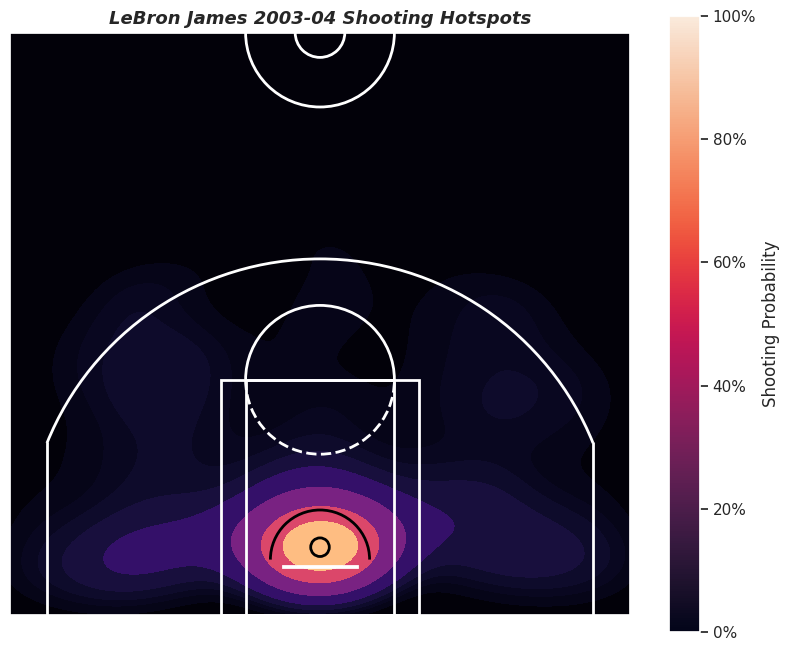

In [50]:
# Simulated player data
np.random.seed(42)
player_data = lebron04_ml
X = player_data.iloc[:, :-1].values
y = player_data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate = 0.03)
gb.fit(X_train, y_train)

# Predict probabilities for each shot
player_data['shot_probability'] = gb.predict_proba(player_data.iloc[:, :-1].values)[:, 1]

# Function to plot the basketball court and shooting hotspots using KDE contour plot
def plot_shooting_hotspots(data):
    # Plot the basketball court
    plt.figure(figsize=(10, 8))

    # Create KDE contour plot
    ax = sns.kdeplot(x=data["LOC_X"], y=data["LOC_Y"], fill=True, cmap="magma", levels=10, thresh=0, common_norm=False)

    # Explicitly show the colorbar with percentage labels
    cbar = plt.colorbar(ax.collections[0], label='Shooting Probability', format=FuncFormatter(lambda x, _: f'{int(x*100)}%'))

    plt.title('LeBron James 2003-04 Shooting Hotspots', fontsize=13, fontweight='bold', fontstyle='oblique')
    plt.xticks([])  # Remove x-axis numbers
    plt.yticks([])  # Remove y-axis numbers
    draw_court(outer_lines=False, color="white", lw=2)
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_visible(False)
    cur_axes.axes.get_yaxis().set_visible(False)
    plt.xlim(-250, 250)
    plt.ylim(0, 470)
    plt.gca().set_aspect('equal', adjustable='box')  # Keep the court aspect ratio

    # Adjust the colorbar position if needed
    cbar.set_label('Shooting Probability')
    plt.show()

# Plot the shooting hotspots on the court using KDE contour plot
plot_shooting_hotspots(player_data)

4.3 **Lebron 2023**

Now the same for the 2022-2023 season

<Figure size 1500x940 with 0 Axes>

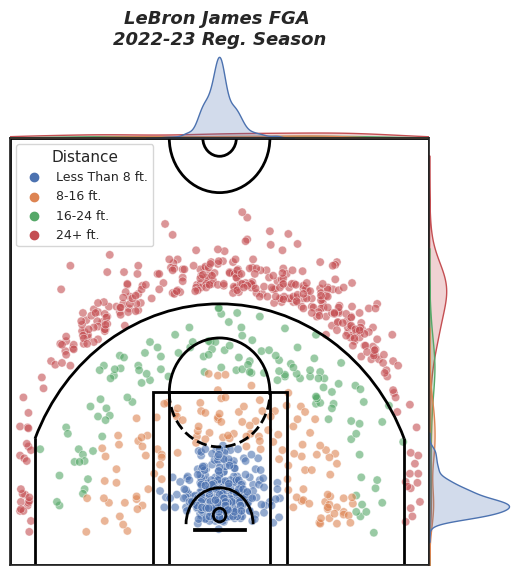

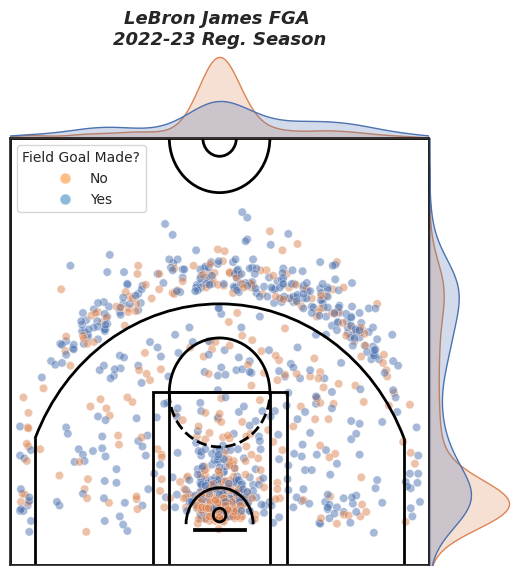

In [51]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(15,9.4))

############################################################################################
#Plotting
sns.jointplot(data = lebron_23, 
              x='LOC_X', 
              y='LOC_Y', 
              kind='scatter', 
              hue='ZONE_RANGE', 
              hue_order=['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.'],
              space=0, 
              alpha=0.6)

#Court and axis
draw_court(outer_lines=True, color="black")
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlim(-250, 250)
plt.ylim(0, 470)

#Title
plt.title('LeBron James FGA \n2022-23 Reg. Season', 
          fontsize=13,
          loc='center',
          fontweight='bold',
          y=1.2, 
          fontstyle='oblique')

#Legend
plt.legend(title='Distance',
          loc='upper left',
          title_fontsize= 11,
          fontsize = 9)


###########################################################################
#Plotting
g = sns.jointplot(data = lebron_23, 
                   x='LOC_X', 
                   y='LOC_Y', 
                   kind='scatter',
                   hue='SHOT_MADE',
                   space=0, 
                   alpha=0.5, legend=False)

#Court and axes
draw_court(outer_lines=True, color="black")
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlim(-250, 250)
plt.ylim(0, 470)

#Title
plt.title('LeBron James FGA \n2022-23 Reg. Season', 
          fontsize=13,
          loc='center',
          fontweight='bold',
          y=1.2, 
          fontstyle='oblique')

from matplotlib.lines import Line2D
#Legend
legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:orange', markersize=8, alpha=0.5, label='No'),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:blue', markersize=8, alpha=0.5,  label='Yes')]
g.ax_joint.legend(handles=legend_labels, title='Field Goal Made?', loc='upper left', title_fontsize=10, fontsize=10)

       
plt.show()

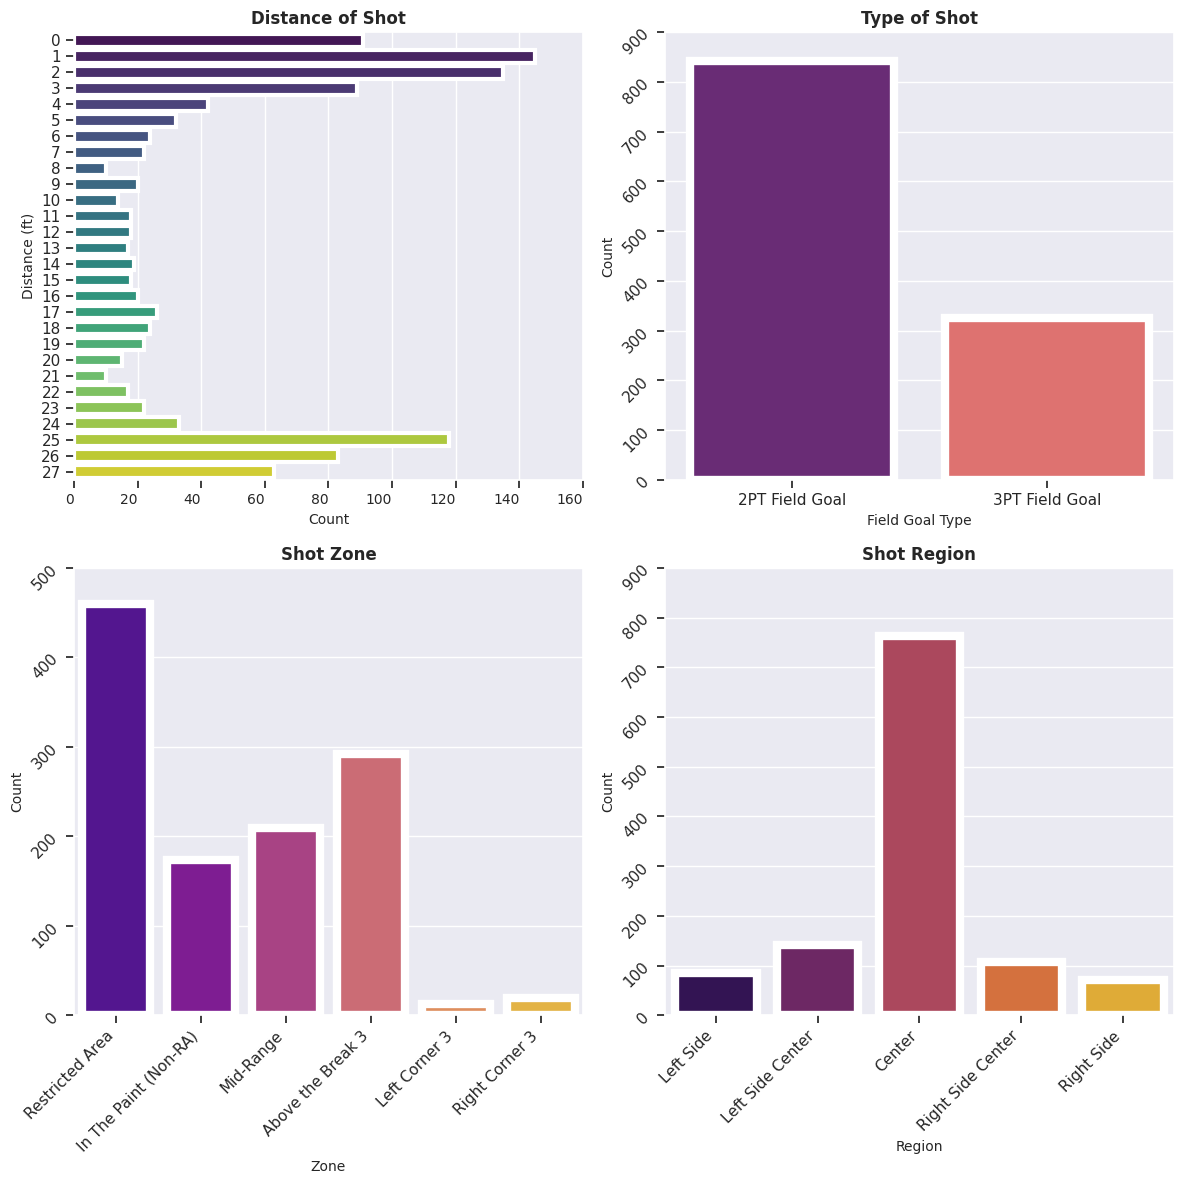

In [118]:
#Setting up subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
sns.set_theme(style="darkgrid")


df=lebron_23
# Plot 1: Countplot for 'day'
sns.countplot(y="SHOT_DISTANCE", data=df, ax=ax[0, 0], palette='viridis', edgecolor = "white", linewidth=3)
ax[0, 0].set_title('Distance of Shot', fontweight='bold')
ax[0, 0].set_xlabel('Count', size=10)
ax[0, 0].set_ylabel('Distance (ft)', size=10)
ax[0, 0].set_xticks(ax[0, 0].get_xticks())
ax[0, 0].set_yticks(ax[0, 0].get_yticks())
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=0, ha='right', size=10)
ax[0, 0].set_yticklabels(ax[0, 0].get_yticklabels(), rotation=0, ha='right')
ax[0, 0].tick_params(bottom=True, left=True)

# Plot 2: Countplot for 'sex'
sns.countplot(x="SHOT_TYPE", data=df, ax=ax[0, 1], palette='magma', edgecolor = "white", linewidth=6, 
              order=['2PT Field Goal', '3PT Field Goal'])
ax[0, 1].set_title('Type of Shot', fontweight='bold')
ax[0, 1].set_xlabel('Field Goal Type', size=10)
ax[0, 1].set_ylabel('Count', size=10)
ax[0, 1].set_xticks(ax[0, 1].get_xticks())
ax[0, 1].set_yticks(ax[0, 1].get_yticks())
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=0, ha='center')
ax[0, 1].set_yticklabels(ax[0, 1].get_yticklabels(), rotation=45, ha='right')
ax[0, 1].tick_params(bottom=True, left=True)

# Plot 3: Countplot for 'time'
sns.countplot(x="BASIC_ZONE", data=df, ax=ax[1, 0], palette='plasma',edgecolor = "white", linewidth=6,
              order=['Restricted Area', 'In The Paint (Non-RA)', 'Mid-Range','Above the Break 3', 'Left Corner 3', 'Right Corner 3'])
ax[1, 0].set_title('Shot Zone', fontweight='bold')
ax[1, 0].set_xlabel('Zone', size=10)
ax[1, 0].set_ylabel('Count', size=10)
ax[1, 0].set_xticks(ax[1, 0].get_xticks())
ax[1, 0].set_yticks(ax[1, 0].get_yticks())
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45, ha='right')
ax[1, 0].set_yticklabels(ax[1, 0].get_yticklabels(), rotation=45, ha='right')
ax[1, 0].tick_params(bottom=True, left=True)

# Plot 4: Countplot for 'size'
sns.countplot(x="ZONE_NAME", data=df, ax=ax[1, 1], palette='inferno', edgecolor = "white", linewidth=6, 
              order=['Left Side', 'Left Side Center', 'Center', 'Right Side Center', 'Right Side'])
ax[1, 1].set_title('Shot Region', fontweight='bold')
ax[1, 1].set_xlabel('Region', size=10)
ax[1, 1].set_ylabel('Count', size=10)
ax[1, 1].set_xticks(ax[1, 1].get_xticks())
ax[1, 1].set_yticks(ax[0, 1].get_yticks())
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45, ha='right')
ax[1, 1].set_yticklabels(ax[1, 1].get_yticklabels(), rotation=45, ha='right')
ax[1, 1].tick_params(bottom=True, left=True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

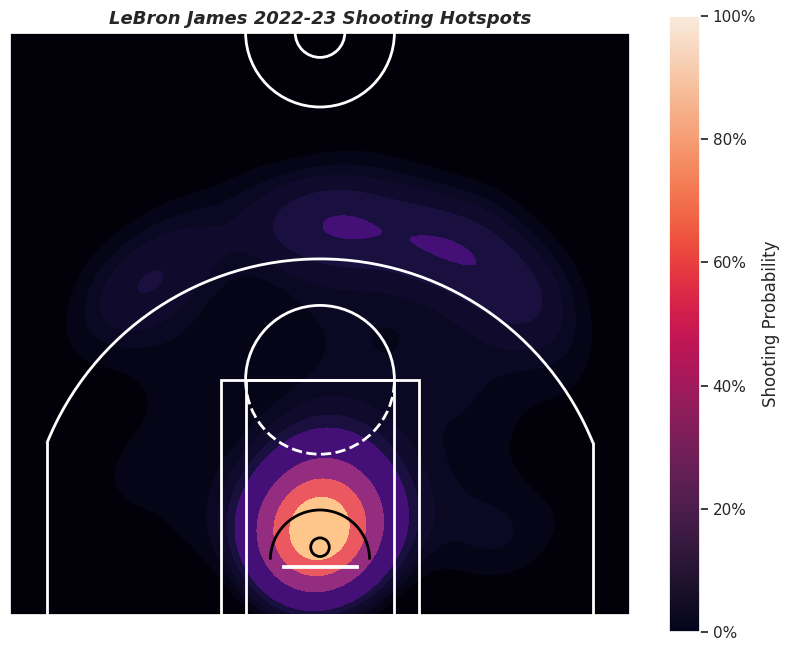

In [53]:
# Simulated player data
np.random.seed(42)
player_data = lebron23_ml
X = player_data.iloc[:, :-1].values
y = player_data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate = 0.03)
gb.fit(X_train, y_train)

# Predict probabilities for each shot
player_data['shot_probability'] = gb.predict_proba(player_data.iloc[:, :-1].values)[:, 1]

# Function to plot the basketball court and shooting hotspots using KDE contour plot
def plot_shooting_hotspots(data):
    # Plot the basketball court
    plt.figure(figsize=(10, 8))

    # Create KDE contour plot
    ax = sns.kdeplot(x=data["LOC_X"], y=data["LOC_Y"], fill=True, cmap="magma", levels=10, thresh=0, common_norm=False)

    # Explicitly show the colorbar with percentage labels
    cbar = plt.colorbar(ax.collections[0], label='Shooting Probability', format=FuncFormatter(lambda x, _: f'{int(x*100)}%'))

    plt.title('LeBron James 2022-23 Shooting Hotspots', fontsize=13, fontweight='bold', fontstyle='oblique')
    plt.xticks([])  # Remove x-axis numbers
    plt.yticks([])  # Remove y-axis numbers
    draw_court(outer_lines=False, color="white", lw=2)
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_visible(False)
    cur_axes.axes.get_yaxis().set_visible(False)
    plt.xlim(-250, 250)
    plt.ylim(0, 470)
    plt.gca().set_aspect('equal', adjustable='box')  # Keep the court aspect ratio

    # Adjust the colorbar position if needed
    cbar.set_label('Shooting Probability')
    plt.show()

# Plot the shooting hotspots on the court using KDE contour plot
plot_shooting_hotspots(player_data)

We see a clear difference in Lebron's shooting habits with the distribution graph on the right showing us a higher volume of 3-Pointers (24+ft) shot by Lebron in the *2022-23* season incomparison to his rookie season in *2003-04*. The red histogram representing shots of 24+ft distance is pronounce within the 2022-23 visual

# **5. Conclusion**

From our data we see the common trend of every one in the NBA attempting and making more 3-point shots as every season passes. A change like this doesn't come to be without there being an incentive of course or external influence off the court. Starting around the *2013-14* and *2014-2015* seasons behind the scenes the NBA was also going through a but with analstic   with playoff clinching thewhile providing a recipe for success.

Information that we've looked at here is for coaches, trainers, and higher-upmexecuties within teams to make we'll informed decisions about modern trends in the NBA and to have them be preparted for the future.

# **6. Acknowledgements**

kaggle datasets

* **JP Hwang** for his substack and medium articles which inspired my use of heatmaps as a visualization tool.
>https://github.com/databyjp

* ****Bradley Fay**** and **Savvas Tjortjoglou** for providing a template for drawing NBA Courts within python with the code in his github.
>https://github.com/bradleyfay

    >https://savvastjortjoglou.com/nba-shot-sharts.html

* Thank you to **Dominic Samangy** for starting my interest in NBA data visualization with his incredible visuals on Twitter focusing on individual players and teams.
>https://github.com/DomSamangy

In [54]:
player_data = lebron23_ml
X = player_data.iloc[:, :-1].values
y = player_data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Predict probabilities for each shot
player_data['shot_probability'] = gb.predict_proba(player_data.iloc[:, :-1].values)[:, 1]

# Function to plot the basketball court and shooting hotspots
def plot_shooting_hotspots(data):
    # Plot the basketball court
    plt.figure(figsize=(10, 8))
    plt.scatter(data["LOC_X"], data["LOC_Y"], c=data['shot_probability'], cmap="magma", marker='o', s=50, alpha=0.7)
    plt.colorbar(label='Shooting Probability', format=FuncFormatter(lambda x, _: f'{int(x*100)}%'))
    plt.title('LeBron James 2022-23 Shooting Hotspots')
    plt.xticks([])
    plt.yticks([])
    draw_court(outer_lines=False, color="black", lw=3)
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_visible(False)
    cur_axes.axes.get_yaxis().set_visible(False)
    plt.xlim(-250, 250)
    plt.ylim(0, 470)
    plt.gca().set_aspect('equal', adjustable='box')  # Keep the court aspect ratio
    plt.show()

# Plot the shooting hotspots on the court
plot_shooting_hotspots(player_data)

ValueError: Unknown label type: 'continuous'

In [ ]:
#######################################################
#Building a dataset only of Lebron's stats
#shots_04.drop(['SEASON_1', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID','HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'ACTION_TYPE','SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB'], axis=1, inplace=True)
#lebron_04 = shots_04.query('PLAYER_NAME == "LeBron James" & ZONE_RANGE != "Back Court Shot"')


#shots_23.drop(['SEASON_1', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID','HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'ACTION_TYPE','SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB'], axis=1, inplace=True)
#lebron_23 = shots_23.query('PLAYER_NAME == "LeBron James" & ZONE_RANGE != "Back Court Shot"')
#######################################################

#Setting up subplots
fig, ax = plt.subplots(ncols=2, figsize=(15,8.4),  sharex=True, sharey=True)

#Ploting each court
#we use larger values than the axis limits to ensure that hexagons go all the way to the boundaries of our draw court 
#(hexagons outside the plot area are clipped so we won’t see them)
sns.kdeplot(data=lebron_04, 
            x='LOC_X', 
            y='LOC_Y', 
            fill=True, 
            ax=ax[0], cmap='magma', thresh=0, levels=10)

sns.kdeplot(data=lebron_23, 
            x='LOC_X', 
            y='LOC_Y', 
            fill=True, 
            ax=ax[1], cmap='magma', thresh=0, levels=10)


#Add labels to each court image
ax[0].set_title('2003-04', fontsize=23, fontweight='medium', fontstyle='oblique')
ax[1].set_title('2022-23', fontsize=23, fontweight='medium', fontstyle='oblique')

#Costimizing axis ticks, adding courts, and title
for col in range(2):
    ax[col].get_xaxis().set_visible(False)
    ax[col].get_yaxis().set_visible(False)
    draw_court(ax[col], color='white')
              
fig.suptitle("LeBron James FGA\nReg. Season", fontsize=25, fontweight='bold', fontstyle='oblique')




fig.tight_layout()
plt.xlim(-250, 250)
plt.ylim(0, 470)
fig.show()